# <span style="color:blue">Fitness Data</span>

<br>
Here is a plan for our process (those titles are in blue color):

<span style="color:red">
    1.</span> Dataset description;<br>
    <span style="color:red">
    2.</span> Reshaping data;<br>
    <span style="color:red">
    3.</span> Data analysis and visualization;<br>
    <span style="color:red">
    4.</span> Data preprocessing;<br>
    <span style="color:red">
    5.</span> Problem-clustering<br>
    <span style="color:red">
    6.</span> K-means;<br>
    <span style="color:red">
    7.</span> Observing results;<br>
    <span style="color:red">
    8.</span> PCA;<br>
    <span style="color:red">
    9.</span> Hierarchical Clustering;<br>
    <span style="color:red">
    10.</span> DBSCAN Clustering.<br>

Sub-titles of each theme are in green color.
<br><br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats
%matplotlib inline
import json

In [2]:
import os
# import dataset as pandas.DataFrame
data = pd.read_csv('mfp-diaries.tsv', sep='\t')
# read i-th row
for i in range(len(data)):
    user_id = data.iloc[i,0]
    date = data.iloc[i,1]
    food_entries = json.loads(data.iloc[i, 2])
    agregate_intake_goal = json.loads(data.iloc[i,3])

# <span style="color:blue">Dataset description</span>

First of all, I need to study a dataset better. About what is it?
<br><br>

In [3]:
data

,1,2014-09-14,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"": [{""name"": ""Calories"", ""value"": ""412""}, {""name"": ""Carbs"", ""value"": ""29""}, {""name"": ""Fat"", ""value"": ""24""}, {""name"": ""Protein"", ""value"": ""21""}, {""name"": ""Sodium"", ""value"": ""258""}, {""name"": ""Sugar"", ""value"": ""29""}], ""name"": ""my - McDonalds Espresso Pronto\u00ae Flat White, 2 TALL""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""170""}, {""name"": ""Carbs"", ""value"": ""25""}, {""name"": ""Fat"", ""value"": ""5""}, {""name"": ""Protein"", ""value"": ""20""}, {""name"": ""Sodium"", ""value"": ""260""}, {""name"": ""Sugar"", ""value"": ""2""}], ""name"": ""Quest Bar - Banana Nut Muffin Natural Protein Bar, 60 g""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""176""}, {""name"": ""Carbs"", ""value"": ""33""}, {""name"": ""Fat"", ""value"": ""1""}, {""name"": ""Protein"", ""value"": ""5""}, {""name"": ""Sodium"", ""value"": ""195""}, {""name"": ""Sugar"", ""value"": ""0""}], ""name"": ""Uncle Tobys Australia - Vita Brits, 3 Biscuits 33.3g""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""342""}, {""name"": ""Carbs"", ""value"": ""34""}, {""name"": ""Fat"", ""value"": ""12""}, {""name"": ""Protein"", ""value"": ""24""}, {""name"": ""Sodium"", ""value"": ""402""}, {""name"": ""Sugar"", ""value"": ""34""}], ""name"": ""Pauls - Smarter White Milk, 600 ml""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""180""}, {""name"": ""Carbs"", ""value"": ""22""}, {""name"": ""Fat"", ""value"": ""7""}, {""name"": ""Protein"", ""value"": ""21""}, {""name"": ""Sodium"", ""value"": ""310""}, {""name"": ""Sugar"", ""value"": ""1""}], ""name"": ""Quest Bar - Cookies and Cream, 1 bar""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""180""}, {""name"": ""Carbs"", ""value"": ""46""}, {""name"": ""Fat"", ""value"": ""0""}, {""name"": ""Protein"", ""value"": ""0""}, {""name"": ""Sodium"", ""value"": ""100""}, {""name"": ""Sugar"", ""value"": ""22""}], ""name"": ""Gu Sports - Chomps, 8 pieces""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""170""}, {""name"": ""Carbs"", ""value"": ""25""}, {""name"": ""Fat"", ""value"": ""5""}, {""name"": ""Protein"", ""value"": ""20""}, {""name"": ""Sodium"", ""value"": ""260""}, {""name"": ""Sugar"", ""value"": ""2""}], ""name"": ""Quest Bar - Banana Nut Muffin Natural Protein Bar, 60 g""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""160""}, {""name"": ""Carbs"", ""value"": ""25""}, {""name"": ""Fat"", ""value"": ""5""}, {""name"": ""Protein"", ""value"": ""20""}, {""name"": ""Sodium"", ""value"": ""240""}, {""name"": ""Sugar"", ""value"": ""2""}], ""name"": ""Quest - Protein Bar Chocolate Peanut Butter, 1 bar (60 g)""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""686""}, {""name"": ""Carbs"", ""value"": ""59""}, {""name"": ""Fat"", ""value"": ""31""}, {""name"": ""Protein"", ""value"": ""40""}, {""name"": ""Sodium"", ""value"": ""1,105""}, {""name"": ""Sugar"", ""value"": ""9""}], ""name"": ""Grilld - Simply Grilled (Real), 1.25 burger""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""252""}, {""name"": ""Carbs"", ""value"": ""27""}, {""name"": ""Fat"", ""value"": ""14""}, {""name"": ""Protein"", ""value"": ""5""}, {""name"": ""Sodium"", ""value"": ""352""}, {""name"": ""Sugar"", ""value"": ""1""}], ""name"": ""Grilld - Snack Chips, 1 snack size""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""196""}, {""name"": ""Carbs"", ""value"": ""15""}, {""name"": ""Fat"", ""value"": ""10""}, {""name"": ""Protein"", ""value"": ""10""}, {""name"": ""Sodium"", ""value"": ""176""}, {""name"": ""Sugar"", ""value"": ""7""}], ""name"": ""Tasti - Salted Caramel Protein Bar, 40 g""}], ""sequence"": 1}]","{""total"": [{""name"": ""Calories"", ""value"": 2924}, {""name"": ""Carbs"", ""value"": 340}, {""name"": ""Fat"", ""value"": 114}, {""name"": ""Protein"", ""value"": 186}, {""name"": ""Sodium"", ""value"": 3658}, {""n

<br>
We can see that data is much deeper than it seems. From this perspective, it contains 4 columns and 587186 rows.
<br><br>

In [4]:
data.shape

(587186, 4)

<br>
Now it will be best to observe one specific row to understand what these columns are.
<br><br>

In [5]:
data.iloc[0,0], data.iloc[0,1]

(1, '2014-09-15')

<br>
As we already realized, the first column is an id of a user. We can see that data contains those ids more than once. It should be because of dates.
The second column contains dates. It means the dataset reveals some information on specific dates. <br>
From the third column, we can see that it starts with my food or breakfast. Pre-definition of it could be that my food shows that the user has eaten (or needs to eat) and others shows what one should have eaten.
<br>
<br>

In [6]:
json.loads(data.iloc[0,2])

[{'meal': 'MY food',
  'dishes': [{'nutritions': [{'name': 'Calories', 'value': '412'},
     {'name': 'Carbs', 'value': '29'},
     {'name': 'Fat', 'value': '24'},
     {'name': 'Protein', 'value': '21'},
     {'name': 'Sodium', 'value': '258'},
     {'name': 'Sugar', 'value': '29'}],
    'name': 'my - McDonalds Espresso Pronto® Flat White, 2 TALL'},
   {'nutritions': [{'name': 'Calories', 'value': '176'},
     {'name': 'Carbs', 'value': '33'},
     {'name': 'Fat', 'value': '1'},
     {'name': 'Protein', 'value': '5'},
     {'name': 'Sodium', 'value': '195'},
     {'name': 'Sugar', 'value': '0'}],
    'name': 'Uncle Tobys Australia - Vita Brits, 3 Biscuits 33.3g'},
   {'nutritions': [{'name': 'Calories', 'value': '342'},
     {'name': 'Carbs', 'value': '34'},
     {'name': 'Fat', 'value': '12'},
     {'name': 'Protein', 'value': '24'},
     {'name': 'Sodium', 'value': '402'},
     {'name': 'Sugar', 'value': '34'}],
    'name': 'Pauls - Smarter White Milk, 600 ml'},
   {'nutritions': [{

<br>
From this data, we see that my food contains only one meal and dishes are combines from breakfast, lunch... <br>
This is eaten food by a user.
<br><br>

In [7]:
json.loads(data.iloc[587181,2])

[{'meal': 'Breakfast',
  'dishes': [{'nutritions': [{'name': 'Calories', 'value': '300'},
     {'name': 'Carbs', 'value': '26'},
     {'name': 'Fat', 'value': '16'},
     {'name': 'Protein', 'value': '12'},
     {'name': 'Fiber', 'value': '1'},
     {'name': 'Sugar', 'value': '2'}],
    'name': 'Mcdonalds - Breakfast Sausage Burrito, 1 Burrito'}],
  'sequence': 1},
 {'meal': 'Lunch',
  'dishes': [{'nutritions': [{'name': 'Calories', 'value': '210'},
     {'name': 'Carbs', 'value': '27'},
     {'name': 'Fat', 'value': '9'},
     {'name': 'Protein', 'value': '3'},
     {'name': 'Fiber', 'value': '6'},
     {'name': 'Sugar', 'value': '6'}],
    'name': 'Whole Foods Market - Chicken Tortilla Soup, 1 container (3 cup (226g) ea.)'},
   {'nutritions': [{'name': 'Calories', 'value': '91'},
     {'name': 'Carbs', 'value': '5'},
     {'name': 'Fat', 'value': '4'},
     {'name': 'Protein', 'value': '1'},
     {'name': 'Fiber', 'value': '1'},
     {'name': 'Sugar', 'value': '0'}],
    'name': 'Hom

<br>
In this situation, meals are more than one, separated and reveals detailed information about what dishes a user must have eaten on breakfast, lunch...
<br><br>

In [8]:
json.loads(data.iloc[0,2])[0]["dishes"][0]

{'nutritions': [{'name': 'Calories', 'value': '412'},
  {'name': 'Carbs', 'value': '29'},
  {'name': 'Fat', 'value': '24'},
  {'name': 'Protein', 'value': '21'},
  {'name': 'Sodium', 'value': '258'},
  {'name': 'Sugar', 'value': '29'}],
 'name': 'my - McDonalds Espresso Pronto® Flat White, 2 TALL'}

<br>
Every nutritions amount in a dish is clarified into value.
<br><br>

In [9]:
data.iloc[0,3]

'{"total": [{"name": "Calories", "value": 2430}, {"name": "Carbs", "value": 96}, {"name": "Fat", "value": 37}, {"name": "Protein", "value": 50}, {"name": "Sodium", "value": 855}, {"name": "Sugar", "value": 63}], "goal": [{"name": "Calories", "value": 1572}, {"name": "Carbs", "value": 196}, {"name": "Fat", "value": 52}, {"name": "Protein", "value": 79}, {"name": "Sodium", "value": 2300}, {"name": "Sugar", "value": 59}]}'

<br>
Here, we see the results of the days. How much nutrition the user got during the day and what was a predefined goal.
<br><br>

In [10]:
json.loads(data.iloc[0,2])[0]

{'meal': 'MY food',
 'dishes': [{'nutritions': [{'name': 'Calories', 'value': '412'},
    {'name': 'Carbs', 'value': '29'},
    {'name': 'Fat', 'value': '24'},
    {'name': 'Protein', 'value': '21'},
    {'name': 'Sodium', 'value': '258'},
    {'name': 'Sugar', 'value': '29'}],
   'name': 'my - McDonalds Espresso Pronto® Flat White, 2 TALL'},
  {'nutritions': [{'name': 'Calories', 'value': '176'},
    {'name': 'Carbs', 'value': '33'},
    {'name': 'Fat', 'value': '1'},
    {'name': 'Protein', 'value': '5'},
    {'name': 'Sodium', 'value': '195'},
    {'name': 'Sugar', 'value': '0'}],
   'name': 'Uncle Tobys Australia - Vita Brits, 3 Biscuits 33.3g'},
  {'nutritions': [{'name': 'Calories', 'value': '342'},
    {'name': 'Carbs', 'value': '34'},
    {'name': 'Fat', 'value': '12'},
    {'name': 'Protein', 'value': '24'},
    {'name': 'Sodium', 'value': '402'},
    {'name': 'Sugar', 'value': '34'}],
   'name': 'Pauls - Smarter White Milk, 600 ml'},
  {'nutritions': [{'name': 'Calories', 'va

<br><span style="color:brown">The main thing to notice is that our information is a list-dictionary that contains sub-list-dictionaries. Panda doesn't allow us to create data frames with sub-data frames, I think. Therefore, we need somehow make information approachable.<br>
We could create few tables (connected with unique ideas, for instance). However, after observation, I realized the dataset is ideologically really well-packed. Moreover, it reasonable to disrupt and spread the table.</span>
<br><br>
# <span style="color:blue">Reshaping data</span>
<br>
I will add some columns. Logically, one column could be meal_type (for example, my food, breakfast, lunch). Similar additions, will make matrix m (starting length of matrix) * n (sub-matrix length) size. Those increase matrix length too much.
<br><br>

In [11]:
nutrition_dict={}
start_cols=['user_id','date','meal_type']

for i in range(len(data)):
    food_entries = json.loads(data.iloc[i, 2])
    for i, meal in enumerate(food_entries):
        for dish in meal['dishes']:
            for nutrition in dish['nutritions']:
                nutrition_dict[nutrition['name']] = 0
print(start_cols, nutrition_dict)

['user_id', 'date', 'meal_type'] {'Calories': 0, 'Carbs': 0, 'Fat': 0, 'Protein': 0, 'Sodium': 0, 'Sugar': 0, 'Fiber': 0, 'Potass.': 0, 'Iron': 0, 'Calcium': 0, 'Sat Fat': 0, 'Chol': 0, 'Vit A': 0, 'Vit C': 0, 'Trn Fat': 0, 'Mon Fat': 0, 'Ply Fat': 0}


<br>
Here we remove sequences because it already meant in this table. We also can remove dishes ' names and sum up each meal's nutrition. Like down below. It is a good idea because food names are all different and probably large numbers.
<br><br>

In [12]:
new_data=[]
cols = start_cols
for i in range(len(data)):
    user_id = data.iloc[i,0]
    date = data.iloc[i,1]
    food_entries = json.loads(data.iloc[i, 2])
    for i, meal in enumerate(food_entries):
        food_data = nutrition_dict.copy()
        col=[user_id, date]
        col.append(meal['meal'])
        for dish in meal['dishes']:
            for nutrition in dish['nutritions']:
                food_data[nutrition['name']] += int(nutrition['value'].replace(",",""))
        col += list(food_data.values())
        new_data.append(col)
cols += list(nutrition_dict.keys())
df=pd.DataFrame(data=new_data,columns=cols)

In [13]:
df.head()

,user_id,date,meal_type,Calories,Carbs,Fat,Protein,Sodium,Sugar,Fiber,Potass.,Iron,Calcium,Sat Fat,Chol,Vit A,Vit C,Trn Fat,Mon Fat,Ply Fat
0,1,2014-09-15,MY food,2430,96,37,50,855,63,0,0,0,0,0,0,0,0,0,0,0
1,1,2014-09-16,MY food,1862,158,54,114,2215,100,0,0,0,0,0,0,0,0,0,0,0
2,1,2014-09-17,MY food,2251,187,60,98,1765,105,0,0,0,0,0,0,0,0,0,0,0
3,1,2014-09-18,MY food,2001,113,81,202,1101,71,0,0,0,0,0,0,0,0,0,0,0
4,1,2014-09-19,MY food,2158,180,89,115,1998,84,0,0,0,0,0,0,0,0,0,0,0


# <span style="color:blue">Data analysis and visualization</span>

In [14]:
df.shape

(2073989, 20)

In [15]:
def nullPer(df):
    for col in df.columns:
        nullOrNot = df[col].isnull()
        nullNumber = nullOrNot.sum()
        print(col, str(nullNumber / len(df[col]) * 100) + '%')
nullPer(df)

user_id 0.0%
date 0.0%
meal_type 0.0%
Calories 0.0%
Carbs 0.0%
Fat 0.0%
Protein 0.0%
Sodium 0.0%
Sugar 0.0%
Fiber 0.0%
Potass. 0.0%
Iron 0.0%
Calcium 0.0%
Sat Fat 0.0%
Chol 0.0%
Vit A 0.0%
Vit C 0.0%
Trn Fat 0.0%
Mon Fat 0.0%
Ply Fat 0.0%


<br>
There are no nulls, as was expected. Because we have 0 in nutrition columns.
<br><br>

In [16]:
def nullPer(df):
    for col in df.columns:
        nullOrNot = df[col] == 0
        nullNumber = nullOrNot.sum()
        print(col, str(nullNumber / len(df[col]) * 100) + '%')
nullPer(df)

user_id 0.0%
date 0.0%
meal_type 0.0%
Calories 0.4987008127815528%
Carbs 6.510834917639389%
Fat 11.059219696922211%
Protein 6.853266820605124%
Sodium 38.8539669207503%
Sugar 46.15361990830231%
Fiber 65.32913144669523%
Potass. 97.54791370638898%
Iron 95.76960147811778%
Calcium 96.67563328445812%
Sat Fat 97.75413466513082%
Chol 98.00413599107807%
Vit A 99.90294066169106%
Vit C 99.78698054811284%
Trn Fat 99.98312430779526%
Mon Fat 99.9487943282245%
Ply Fat 99.93847604784789%


<br>
After sugar, every column contains more than 50% of 0 number. Lately, we can remove those columns if we needed.
<br><br>

In [17]:
df.dtypes

user_id       int64
date         object
meal_type    object
Calories      int64
Carbs         int64
Fat           int64
Protein       int64
Sodium        int64
Sugar         int64
Fiber         int64
Potass.       int64
Iron          int64
Calcium       int64
Sat Fat       int64
Chol          int64
Vit A         int64
Vit C         int64
Trn Fat       int64
Mon Fat       int64
Ply Fat       int64
dtype: object

<br>
And every nutrition column contains integers. Logical. Let's separate numeric and categorical values.
<br><br>

In [18]:
cat_cols=list()
num_cols=list()
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        num_cols.append(col)
    else:
        cat_cols.append(col)
print("Numeric: " ,num_cols, end='\n\n')
print("Categorical: " ,cat_cols)

Numeric:  ['user_id', 'Calories', 'Carbs', 'Fat', 'Protein', 'Sodium', 'Sugar', 'Fiber', 'Potass.', 'Iron', 'Calcium', 'Sat Fat', 'Chol', 'Vit A', 'Vit C', 'Trn Fat', 'Mon Fat', 'Ply Fat']

Categorical:  ['date', 'meal_type']


## <span style="color:Green">Data visualization -- Categorical features</span>

<br>
Let's visualize information because we can get lots of things from it. The first is <span style="color:red">dates</span>.
<br><br>

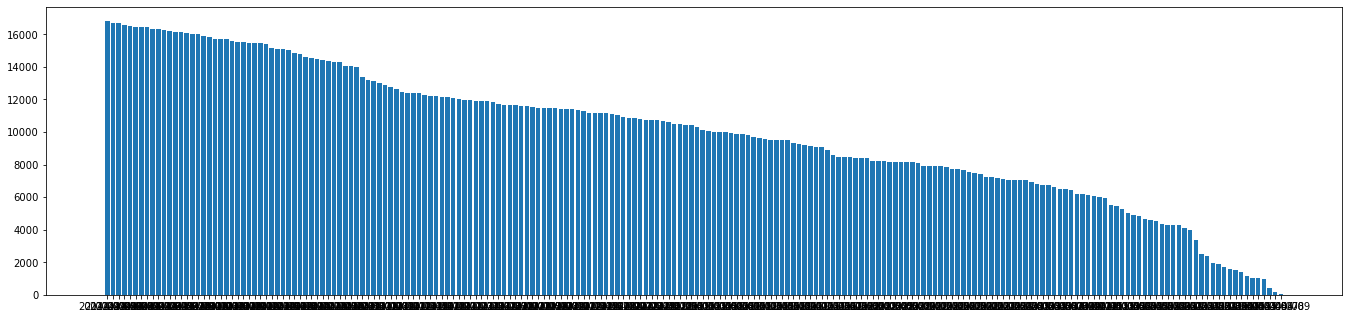

In [19]:
fig = plt.figure(1,figsize=(18,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(df["date"].unique(),df["date"].value_counts())
plt.show()

<br>
It feels that the dataset is quite good because the information amount on dates is well spread.
<br><br>

In [20]:
dates_list=list()
for i in df["date"]:
    if(not str(i)[:4] in dates_list):
        dates_list.append(str(i)[:4])
dates_list

['2014', '2015']

<br>We can see that the dataset contains only two years' results (<span style="color:red">2014, 2015</span>). It will be helpful to transform it into a numeric feature.
<br>The second is <span style="color:red">meal_type</span>.
<br><br>

In [21]:
meals = df["meal_type"].unique()
print(meals, len(meals))

['MY food' 'Breakfast' 'Lunch' ... 'Omnomnomnomnom'
 '(/ .□.)\\ ︵╰(゜Д゜)╯︵ /(.□. \\)' 'Daily Supplements'] 5217


<br>
We see that some meals have strange names, and unusual too. Their number is large, so let's make all those as one calles unusual.
<br><br>

In [22]:
new_meals = list()
for meal in meals:
    elem = str(meal)
    if(elem.isalpha() != -1):
        new_meals.append(elem.lower())
new_meals = np.unique(new_meals)
# So we have a set of proper name meals. Now, let's count frequencies.
meal_dict = {new_meals[i]: 0 for i in range(len(new_meals))}
len(new_meals)

4650

<br>
So, we have a dictionary of meal names with 0 values. Below, the code counts the frequency of each meal_type.
<br><br>

In [23]:
for it in range(len(new_data)):
    i = str(new_data[it][2])
    meal_dict[i.lower()]+=1
meal_dict = sorted(meal_dict.items(), key=lambda x: x[1])
meal_dict.reverse()
meal_dict = meal_dict[0:20]
print(meal_dict)

[('breakfast', 452968), ('lunch', 416714), ('dinner', 371089), ('snacks', 233123), ('snack', 39421), ('afternoon snack', 31397), ('morning snack', 23752), ('meal 1', 16325), ('meal 2', 14475), ('meal 3', 13226), ('evening snack', 12400), ('drinks', 11377), ('meal 4', 9835), ('snack 1', 6950), ('meal 5', 6540), ('am snack', 6062), ('supplements', 5952), ('pm snack', 5931), ('dessert', 5687), ('afternoon snacks', 5429)]


<br>
It will be a good idea to shorten this list to 20 because the number of different meal_types is too large (4650). That left once will be from the most frequent meal_types.
<br>
<br>

In [24]:
for it in range(len(new_data)):
    i = str(new_data[it][2]).lower()
    found = False
    if i == 'my food':
        found = True
        new_data[it][2] = i
    else:
        for x, y in meal_dict:
            if i in x:
                new_data[it][2] = x
                found =True
                break
        if(not found): new_data[it][2] = 'unusual'
df=pd.DataFrame(data=new_data,columns=cols)

<br>
I discovered that updating and iterating panda's data frames are too slow because it was built on NumPy.
<br><br>

In [25]:
print(df["meal_type"].unique())

['my food' 'breakfast' 'lunch' 'dinner' 'snacks' 'afternoon snack'
 'unusual' 'am snack' 'pm snack' 'meal 1' 'meal 2' 'meal 3' 'meal 4'
 'meal 5' 'supplements' 'morning snack' 'snack 1' 'afternoon snacks'
 'dessert' 'drinks' 'evening snack']


<br>
An updated list of meal_types, as we wanted. Below is the visualization of each meal_type count.
<br><br>

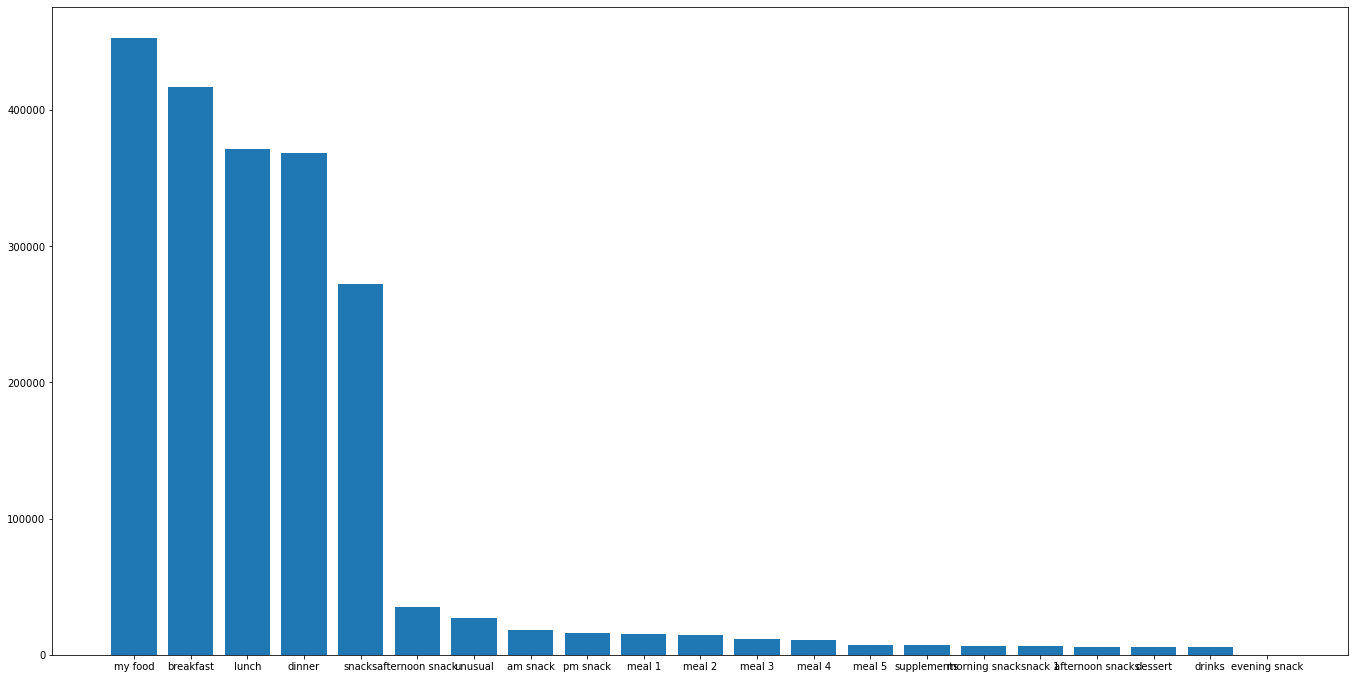

In [26]:
fig = plt.figure(1,figsize=(18,9))
ax = fig.add_axes([0,0,1,1])
ax.bar(df["meal_type"].unique(),df["meal_type"].value_counts())
plt.show()

<br>
Unusual is out value name. And we can see that breakfast, lunch, dinner, and snacks are the most frequent ones. If we needed, it possible to leave only those high frequent once by renaming others unusual too.
<br> <br>

## <span style="color:Green">Data visualization -- Numeric features</span>

In [27]:
df.describe()

,user_id,Calories,Carbs,Fat,Protein,Sodium,Sugar,Fiber,Potass.,Iron,Calcium,Sat Fat,Chol,Vit A,Vit C,Trn Fat,Mon Fat,Ply Fat
count,2.073989e+06,2.073989e+06,2.073989e+06,2.073989e+06,2.073989e+06,2.073989e+06,2.073989e+06,2.073989e+06,2.073989e+06,2.073989e+06,2.073989e+06,2.073989e+06,2.073989e+06,2.073989e+06,2.073989e+06,2.073989e+06,2.073989e+06,2.073989e+06
mean,4.961839e+03,4.031940e+02,4.036324e+01,1.482219e+01,2.090193e+01,3.663252e+02,8.962243e+00,2.099244e+00,1.236948e+01,9.095622e-01,7.539968e-01,1.349872e-01,1.836843e+00,5.969559e-02,1.861047e-01,4.551615e-04,2.191429e-03,2.124409e-03
std,2.841763e+03,1.177817e+03,1.557876e+02,9.590068e+01,3.589327e+01,1.019679e+03,1.180956e+02,7.220374e+00,1.099754e+02,1.118758e+01,1.009356e+01,1.325781e+00,3.127867e+01,4.146960e+00,1.390382e+01,5.850768e-02,1.248475e-01,1.207475e-01
min,1.000000e+00,-5.000000e+02,-1.220000e+02,-3.000000e+01,-3.800000e+01,-1.210000e+02,-4.500000e+01,-1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.544000e+03,2.100000e+02,1.600000e+01,4.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.939000e+03,3.410000e+02,3.300000e+01,1.100000e+01,1.700000e+01,1.100000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.447000e+03,5.110000e+02,5.500000e+01,2.000000e+01,3.000000e+01,5.220000e+02,1.200000e+01,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,9.897000e+03,1.200800e+06,2.100000e+05,1.320880e+05,2.463400e+04,9.600000e+05,1.680000e+05,7.130000e+03,9.765000e+03,1.444000e+03,6.055000e+03,2.590000e+02,3.014800e+04,1.452000e+03,1.000200e+04,2.400000e+01,3.800000e+01,4.500000e+01


<br>
We can see that min/max/mean a little bit strange. Values are too big or too small. Those could be a joke/ incorrect data that a user entered. We need to consider them as outliers later and remove them.
<br><br>

In [28]:
print(num_cols)

['user_id', 'Calories', 'Carbs', 'Fat', 'Protein', 'Sodium', 'Sugar', 'Fiber', 'Potass.', 'Iron', 'Calcium', 'Sat Fat', 'Chol', 'Vit A', 'Vit C', 'Trn Fat', 'Mon Fat', 'Ply Fat']


<br>
They are all nutritions except id, which is not something to survey separately and doesn't contain any information on its own except identification. <br>
As we saw earlier <br>
Calories 0.4987008127815528%
Carbs 6.510834917639389%
Fat 11.059219696922211%
Protein 6.853266820605124%
Sodium 38.8539669207503%
Sugar 46.15361990830231% <br>
Those were containing less 0 than others. Let's see their graphs and skew-ness.
<br><br>

Calories:  748.9251873178074
Carbs:  1194.9984836057774


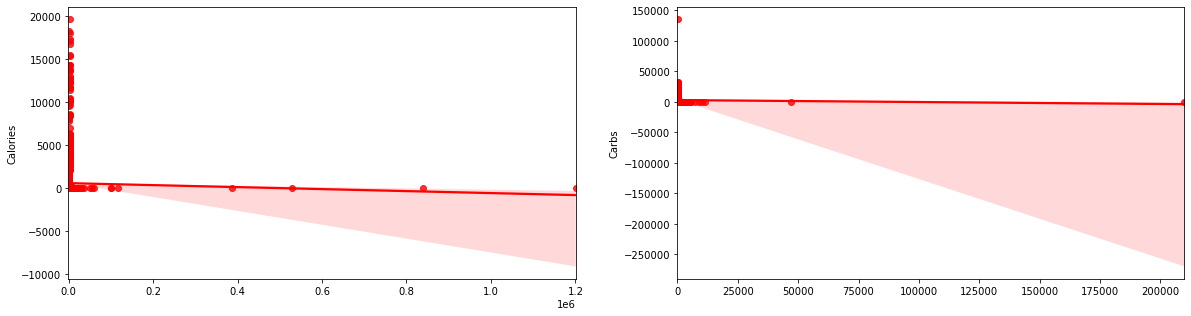

In [29]:
import seaborn as sns;
plt.figure(1,figsize=(20,5))
ax=plt.subplot(1,2,1)
ax=sns.regplot(x=df['Calories'].unique(), y=df['Calories'].value_counts(), color="r")
print('Calories: ', df['Calories'].skew())
plt.figure(1,figsize=(20,5))
ax=plt.subplot(1,2,2)
ax=sns.regplot(x=df['Carbs'].unique(), y=df['Carbs'].value_counts(), color="r")
print('Carbs: ', df['Carbs'].skew())

<br>
<span style="color:red">Calories</span> - We can see that most amount of data is near 0. Furthermore, we see that data has outliers from graph. 
Data skew-ness is extremely large what means that we have out-layers and unnormalized data.
The value range is big.<br>
<span style="color:red">Carbs</span> - We can see that most amount of data is near 0. Furthermore, we see that data has many outliers from graph (but not like calories). 
Data skew-ness is extremely large what means that we have a lot of out-layers and <span style="color:brown">unnormalized</span> data.
The value range is big. 
<br> Those problems should be solved later.
<br><br>

Fat:  1266.1048948614518
Protein:  267.1749997294818


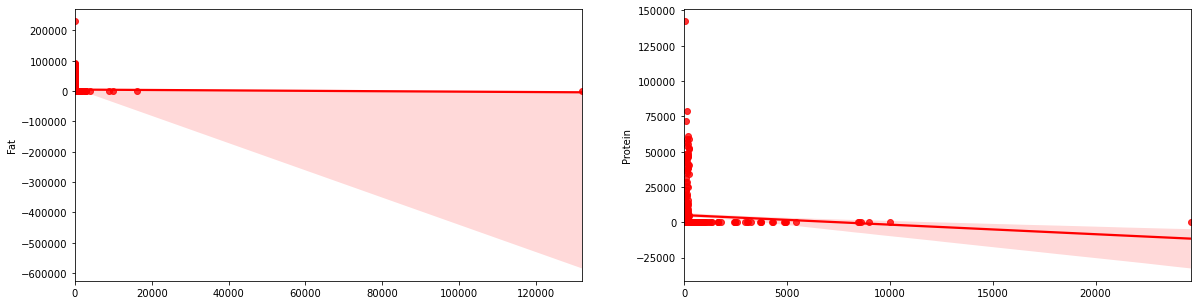

In [30]:
plt.figure(1,figsize=(20,5))
ax=plt.subplot(1,2,1)
ax=sns.regplot(x=df['Fat'].unique(), y=df['Fat'].value_counts(), color="r")
print('Fat: ', df['Fat'].skew())
plt.figure(1,figsize=(20,5))
ax=plt.subplot(1,2,2)
ax=sns.regplot(x=df['Protein'].unique(), y=df['Protein'].value_counts(), color="r")
print('Protein: ', df['Protein'].skew())

<br>
<span style="color:red">Fat</span> - We can see that most amount of data is also near 0. We see that data has outliers from graph. 
Data skew-ness is extremely large what means that we have a lot of out-layers and <span style="color:brown">unnormalized</span> data.
The value range is big.<br>
<span style="color:red">Protein</span> - We can see that most amount of data is from 0 to 60000. We see that data has outliers from graph. 
Data skew-ness is large what means that we have out-layers and <span style="color:brown">unnormalized</span> data.
However, from surveyed nutritions, its skew-ness is <span style="color:brown">smallest</span>.
<br> Those problems should be solved later.
<br><br>

Sodium:  472.6000691637466
Sugar:  1388.173040255296


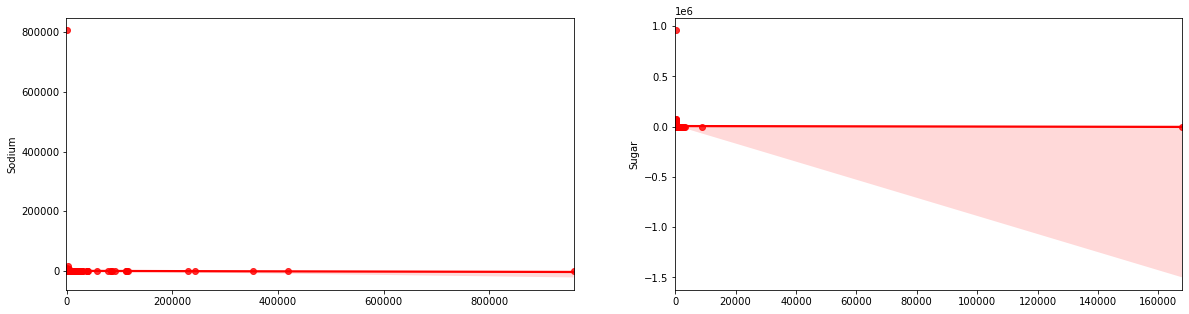

In [31]:
plt.figure(1,figsize=(20,5))
ax=plt.subplot(1,2,1)
ax=sns.regplot(x=df['Sodium'].unique(), y=df['Sodium'].value_counts(), color="r")
print('Sodium: ', df['Sodium'].skew())
plt.figure(1,figsize=(20,5))
ax=plt.subplot(1,2,2)
ax=sns.regplot(x=df['Sugar'].unique(), y=df['Sugar'].value_counts(), color="r")
print('Sugar: ', df['Sugar'].skew())

<br>
<span style="color:red">Sodium And Sugar</span> - We can see that most amount of data is near 0.
Data skew-ness is large what means that we have out-layers and unnormalized data. 
The value range for Sodium is big.
<br> Those problems should be solved later.
<br><br>

In [32]:
for name in num_cols[7:]:
    print(name + ': ', df[name].skew())

Fiber:  509.84095114239364
Potass.:  15.285213067019182
Iron:  56.77667703155121
Calcium:  315.97997581937165
Sat Fat:  28.178223731672844
Chol:  446.0178854439891
Vit A:  128.69527511182903
Vit C:  351.3156416331089
Trn Fat:  215.66882436376386
Mon Fat:  90.27931250571073
Ply Fat:  110.74587409741858


<br>
Skew-nesses are all left for every nutrition. Fiber, Chol, Vit C have higher than others. It needs to be solved with
<br><span style="color:brown">log or log1 transformation</span> - is a convenient means of transforming a highly skewed variable into a more normalized dataset.
<br><br>

## <span style="color:Green">Data visualization -- Bivariate Analysis</span>

<br>
First of all, what we can observe is <span style="color:red">meal_type and different nutritions</span> correlations. Here is a function that will render graphs for the main most frequent meal_types: breakfast, lunch, dinner, snacks.
<br><br>

In [33]:
def countForThisMeal(nutrition):
    all_meal=np.array(df["meal_type"])
    graph_i=0
    for meal, f in meal_dict[:4]:
        for_this_type_meal=[val for index, val in enumerate(df[nutrition]) if all_meal[index]==meal]
        plt.figure(1,figsize=(20,8))
        ax=plt.subplot(2,2,graph_i+1)
        ax=sns.regplot(x=pd.Series(for_this_type_meal).unique(), y=pd.Series(for_this_type_meal).value_counts(), color="blue")
        graph_i+=1
        plt.title(meal)

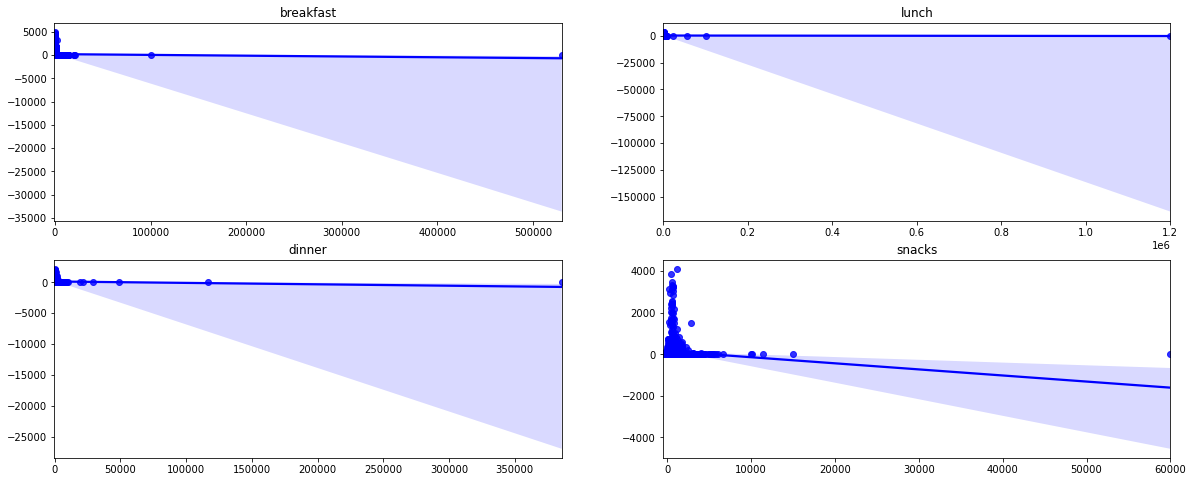

In [34]:
countForThisMeal('Calories')

<br>
<span style="color:red">Calories</span> - If we observe well, all graphs will look the same and have the same shape. We see that all those meals could be low-calory products or high ones. Outlayers seem to be less for Calories than for other nutritions.
<br> <span style="color:brown">Also, the closer the calory value is to 0, the more frequent this value is in the dataset.</span>
<br><br>

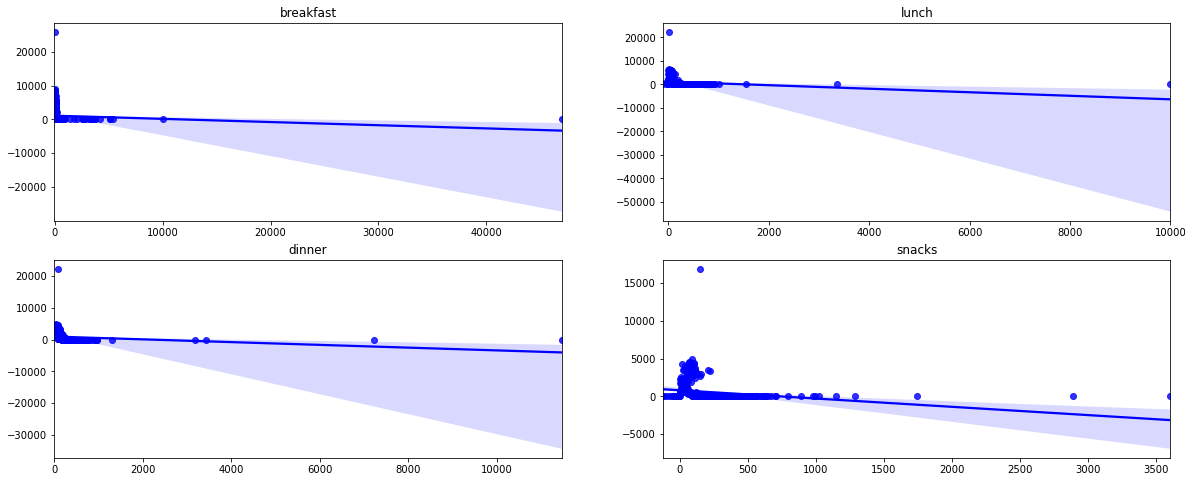

In [35]:
countForThisMeal('Carbs')

<br>
<span style="color:red">Carbs</span> - Everything looks almost the same. The snacks graph is a little bit different. I think it shows that a lot of snacks have 0 carbs. And distribution resembles more normal in snacks graph.
<br><br>

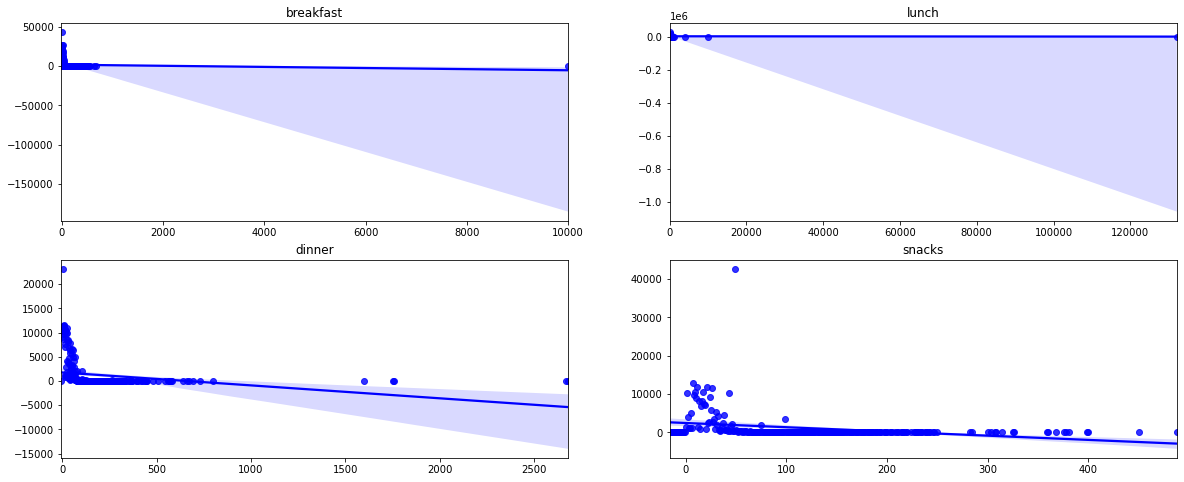

In [36]:
countForThisMeal('Fat')

<br>
<span style="color:red">Carbs</span> -  Everything looks almost the same. We see that the fat value is lower in the lunch graph than in other meal_type or period graphs.
<br><br>

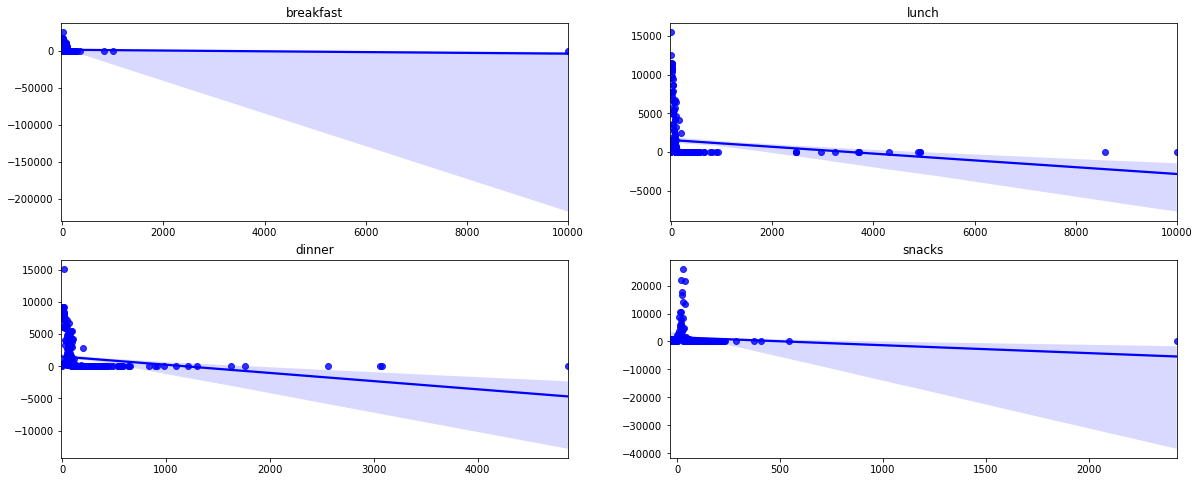

In [37]:
countForThisMeal('Protein')

<br>
<span style="color:red">Protein</span> -  Everything looks almost the same. Outlayers seem to be less for proteins than for other nutritions.
<br><br>

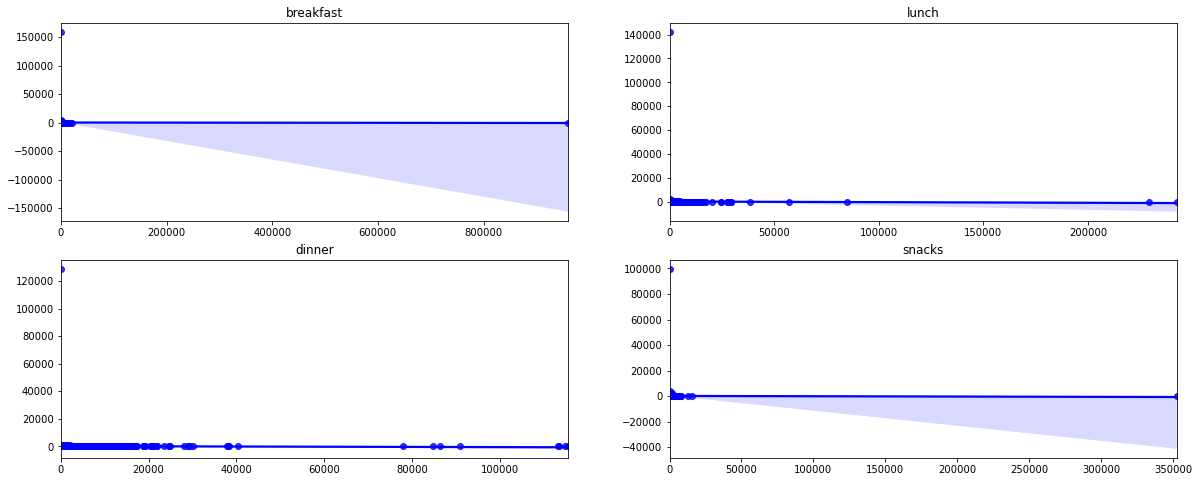

In [38]:
countForThisMeal('Sodium')

<br>
<span style="color:red">Sodium</span> - Graphs are flat. Their shape is different from the upper ones. It seems that Sodium is in everything, probably almost in every food. <br>
<span style="color:brown">According to google</span> = Sodium is found naturally in foods, but a lot of it is added during processing and preparation. Many foods that do not taste salty may still be high in sodium. Large amounts of sodium can be hidden in canned, processed, and convenience foods.
<br><br>

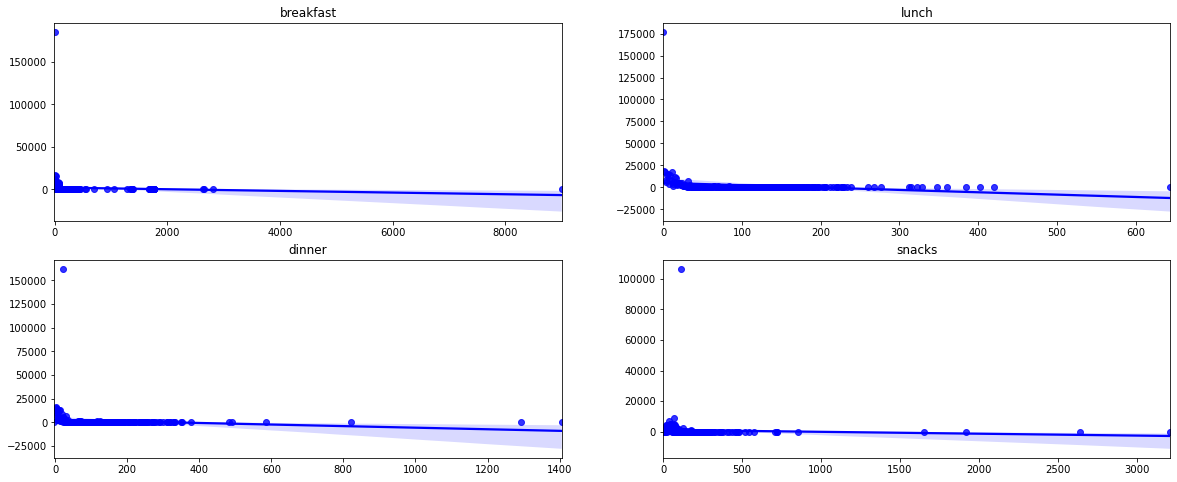

In [39]:
countForThisMeal('Sugar')

<br>
<span style="color:red">Sugar</span> - This graph resembles a sodium graph. Logically, many foods contain sugar too. Also, we can see that at lunch people are getting more sugar than at dinner or breakfast. <br> Additionally, snacks contain the highest values of sugar, as we expected.
<br><br>

## <span style="color:Green">Data visualization -- Heat Map</span>

<br>
Now we can observe a heat-map (correlation matrix), which shows the dependence between features.
<br>
Values closer to zero mean there is no linear trend between the two variables.
<br>
The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.<br>
A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.<br>
The larger the number and darker the color the higher the correlation between the two variables.
<br><br>

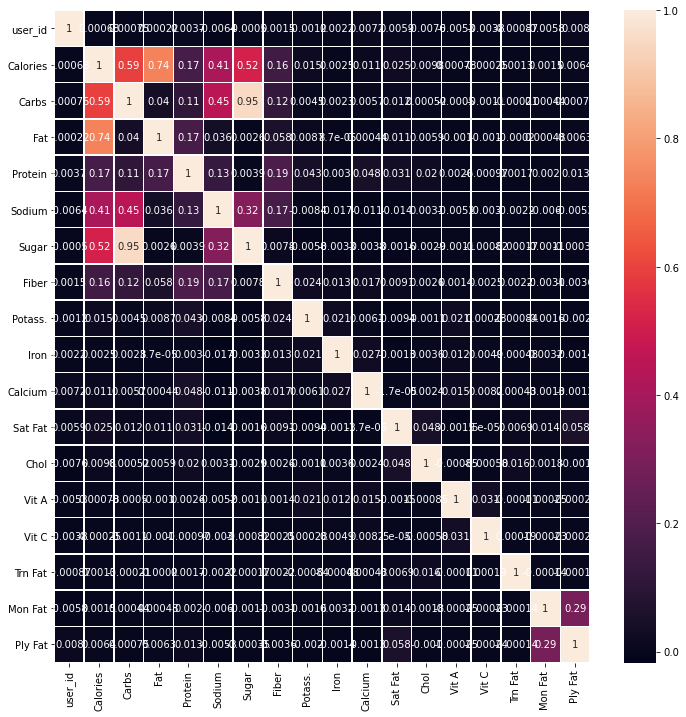

In [40]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(),annot=True, linewidths=.5, ax=ax)
plt.show()

<br>
<span style="color:red">High degree:</span> If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation. <br><span style="color:red">Moderate degree:</span> If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation. <br><span style="color:red">Low degree:</span> When the value lies below + . 29, then it is said to be a small correlation.
<br> <br>
We can see high degree <span style="color:red">correlations</span> between Carbs and Sugar; Calories and Fat; Calories and Carbs; Calories and Sugar.
Moderate degree between Carbs and Sodium...
<br><br>

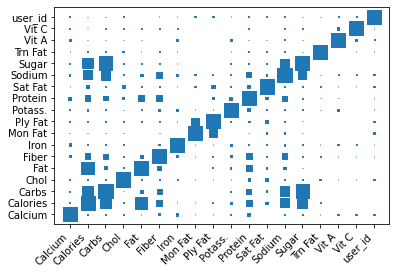

In [41]:
# make a scatter plot
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 200
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
columns = num_cols # all elements should be numeric types.
corr = df[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index')
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

<br> Here we can see exactly same pattern.<br> --> Carbs and Sugar; Calories and Fat; Calories and Carbs; Calories and Sugar; Carbs and Sodium
<br><br>

# <span style="color:blue">Data preprocessing</span>

## <span style="color:green">Remove Duplicates</span>

In [42]:
print("row num - before - ",df.shape[0])
df.drop_duplicates(keep="first", inplace=True)
print("row num - after - ",df.shape[0])

row num - before -  2073989
row num - after -  2071847


## <span style="color:green">Remove columns from table</span>

<br>
We saw that after fiber nutrition contains more than 90% 0 value and doesn't give us much information before.
They don't participate in strong correlations too
<br><br>

In [43]:
for name in num_cols[8:]:
    df.drop(name, axis=1, inplace=True)

<br>
We can remove sugar too, because of a high degree correlation with carbs.
<br><br>

In [44]:
# df.drop('Sugar', axis=1, inplace=True)
# df.drop('Sodium', axis=1, inplace=True)

## <span style="color:green">Outlaiers -- And -- Skew_Ness</span>

<br>
Skew_ness was unbelievably large in analyzing data, upward. It was caused by <span style="color:red; font-weight:normal">outliers</span>. Also, the visualization shows that mostly nutrition's values are too big. To change this, we need to make limits. <br>
Let's minimum take 0 for every nutrition. And search daily max limit: <br>
Calories - 3000c; 
Carbs - 325g; 
Fat - 77g; 
Protein - 80g; 
Sodium - 2300 mg; 
Sugar- 90g; 
Fiber - 30g; 
Potass - 4700 mg; 
Iron - 40 mg; 
Calcium - 2000 mg; 
Sat Fat - 30g; 
Chol - 300 mg; 
Vit A - 700 mcg; 
Vit C - 90mg; 
Trn Fat - 2g; 
Mon Fat - 7g; 
Ply Fat - 7g;??? <br>
Those are daily limits, but let's get them as it is for each meal_type. Maybe someone eats way too much.
<br><br>

In [45]:
limits = {'Calories': (0,3000), 'Carbs': (0, 325), 'Fat': (0, 77), 
          'Protein': (0, 80), 'Sodium': (0, 2.3), 
          'Sugar': (0, 90), 
          'Fiber' :(0, 30)}
for name, lm in limits.items():
    df[name] = df[name].apply(lambda x: lm[0] if x < lm[0] else (lm[1] if x > lm[1] else x))
saved = df.copy(deep=True)

<br>
<span style="color:red; font-weight:normal">Skewness</span> refers to distortion or asymmetry in a symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero, while a lognormal distribution, for example, would exhibit some degree of right-skew.<br>
moment coefficient of skewness - E[((X - mean) / variance)**3] <br>
It can work for only noncategorical variables. And those are some tips:
1.  for left  skewness, take squares, qubes or higher powers
2.  for right skewness, take roots or logarithms or reciprocals (roots are weakest). 
<br><br>

In [46]:
for name in num_cols[1:6]:
    print(name + ': ', df[name].skew())
for name in num_cols[6:8]:
    print(name + ': ', df[name].skew())

Calories:  2.3734563796030947
Carbs:  1.9729021053617863
Fat:  1.717749632483527
Protein:  1.1452026472736483
Sodium:  -0.4361623750620167
Sugar:  2.554228052444452
Fiber:  2.876273600807473


<br>
Skew-ness is more resonable now. We had 0-s in every nutrition column, so we need log1 for decreasing skewness.
<br><br>

In [47]:
for name in num_cols[1:5]:
    df[name] = np.log(df[name] + 1)
    print('new - '+name + ': ', df[name].skew())
df['Sodium'] = np.power(df['Sodium'], 7)
print('new - '+'Sodium' + ': ', df['Sodium'].skew())    
for name in num_cols[6:8]:
    df[name] = np.log(df[name] + 1)
    print('new - '+name + ': ', df[name].skew())

new - Calories:  -2.1523765908109356
new - Carbs:  -1.2642005053961565
new - Fat:  -0.6241563478829308
new - Protein:  -0.8413262731688766
new - Sodium:  -0.4110924334029678
new - Sugar:  0.461395989269683
new - Fiber:  1.161843314783033


In [48]:
len(df['meal_type'].unique())

21

## <span style="color:green">Categotical -- To -- Numeric</span>

<br>
All algorithms needs numeric variables and can't proccess categorical once. We need encoder for this to turn objects into numeric values. We already know that data contains information from 2014-2015 years. 1...24 - Let's use those values for <span style="color:red">dates</span> (1-12 for 2014 and 12-24 for 2015),
<br><br>

In [49]:
new_data = df.values.tolist()
for it in range(len(new_data)):
    i = str(new_data[it][1])
    if (i[:4] == '2014'):
        new_data[it][1] = int(i[5:7])
    else: new_data[it][1] = int(i[5:7]) + 10
df=pd.DataFrame(data=new_data,columns=df.columns)
df['date'].unique()

array([ 9, 10, 11, 12, 13, 14], dtype=int64)

<br>
Now we can change <span style="color:red">meal_types</span> into numeric values too.
<br><br>

In [50]:
indeces=dict()
for index, meal in enumerate(df['meal_type'].unique()):
    # save special index for each unique meal_type
    indeces[meal]=index
df['meal_type']=df['meal_type'].apply(lambda x:indeces[x])
df['meal_type'].unique()
saved1 = df.copy(deep=True)

## <span style="color:green">Scale Data</span>

<br>
We can scale all features in this data frame because they are all numeric and continuous.<br>
Here I am using a library that has this useful feature.
<br><br>

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.iloc[:,1:])
df2=scaler.transform(df.iloc[:,1:])
df2=pd.DataFrame(df2,columns=df.columns[1:])
df2.insert(0, "user_id", np.array(df["user_id"]), True)
df = df2.copy(deep=True)

<br>
Now data means are near 0 and variance near 1.
<br><br>

In [52]:
df.describe()

,user_id,date,meal_type,Calories,Carbs,Fat,Protein,Sodium,Sugar,Fiber
count,2.071847e+06,2.071847e+06,2.071847e+06,2.071847e+06,2.071847e+06,2.071847e+06,2.071847e+06,2.071847e+06,2.071847e+06,2.071847e+06
mean,4.962113e+03,9.175501e-13,7.882176e-16,-8.775322e-15,-1.845142e-15,-9.399416e-15,2.061871e-14,-1.143628e-14,2.802115e-14,-4.712628e-14
std,2.841909e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000e+00,-2.382450e+00,-1.129805e+00,-6.488754e+00,-2.675521e+00,-2.034084e+00,-2.331314e+00,-1.229636e+00,-9.421798e-01,-6.616675e-01
25%,2.544000e+03,-4.380506e-01,-5.428191e-01,-4.139123e-01,-3.346150e-01,-5.843847e-01,-5.933590e-01,-1.229636e+00,-9.421798e-01,-6.616675e-01
50%,4.942000e+03,-4.380506e-01,-2.493263e-01,1.284365e-01,2.380889e-01,2.041929e-01,2.501699e-01,8.165813e-01,-1.548832e-01,-6.616675e-01
75%,7.447000e+03,5.341492e-01,6.311522e-01,5.882697e-01,6.503739e-01,7.082663e-01,7.356903e-01,8.165813e-01,8.959353e-01,8.685557e-01
max,9.897000e+03,2.478549e+00,4.740052e+00,2.591552e+00,2.105828e+00,1.890217e+00,1.593510e+00,8.165813e-01,2.290429e+00,3.128846e+00


## <span style="color:green">Data Reduction</span>

In [53]:
df.info(verbose=False, memory_usage="deep")
print('min', 'max')
for i in df.columns:
    print(df[i].min(), df[i].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071847 entries, 0 to 2071846
Columns: 10 entries, user_id to Fiber
dtypes: float64(9), int64(1)
memory usage: 158.1 MB
min max
1 9897
-2.3824500438762524 2.4785486680713102
-1.1298047930138717 4.740052012793967
-6.488753796744214 2.5915515361178696
-2.675520960358432 2.105828250661038
-2.0340842957302296 1.8902168551838572
-2.3313138602691454 1.5935097322982008
-1.2296364624417142 0.8165813261161192
-0.942179803023726 2.290429412966192
-0.6616674932294642 3.1288455162661215


<br>
We saw that user_id is from 1 to 9897, date is from 9 to 14, meal_type from 0 to 20, and nutrition's maximum could be 341. user_id-int16 date-int8, meal_type-int8 and nutritions-float16 will be enough.
<br><br>

In [54]:
!pip install downcast
from downcast import reduce
df = reduce(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071847 entries, 0 to 2071846
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user_id    int16  
 1   date       float16
 2   meal_type  float16
 3   Calories   float16
 4   Carbs      float16
 5   Fat        float16
 6   Protein    float16
 7   Sodium     float16
 8   Sugar      float16
 9   Fiber      float16
dtypes: float16(9), int16(1)
memory usage: 39.5 MB


<br>
So memory usage was 136.3 and is now 40.9. It makes the working process faster and possible, I think.
<br><br>

# <span style="color:blue">Problem - Clustering</span>

<br>
Clustering is an unsupervised machine learning method of identifying and grouping similar data points in larger datasets without concern for the specific outcome. It is usually used to classify data into structures that are more easily understood and manipulated. <br>
<span style="color:brown">I think, it is a great tool when you’re preparing your data for more intensive analysis. </span> Clustering can not only give you a great starting point but shed light on important features of your data that can be enhanced with deeper analytics.
<br><br>

## <span style="color:blue;">K-means algorithm</span>

<br>
K-means is an iterative, unsupervised clustering algorithm that groups similar instances into clusters. The algorithm starts by guessing the initial centroids for each cluster, and then repeatedly assigns instances to the nearest cluster and re-computes the centroid of that cluster.<br>
We can use a library that contains the full implementation of this algorithm. <span style="color:brown">We still need to describe what will be the best number of clusters.</span>
<br><br>

In [55]:
df2 = df.copy(deep=True)
df2.drop('user_id', axis=1, inplace=True)
df2

,date,meal_type,Calories,Carbs,Fat,Protein,Sodium,Sugar,Fiber
0,-2.382812,-1.129883,2.353516,1.104492,1.242188,1.180664,0.816406,2.039062,-0.661621
1,-2.382812,-1.129883,2.050781,1.512695,1.575195,1.593750,0.816406,2.291016,-0.661621
2,-2.382812,-1.129883,2.265625,1.651367,1.668945,1.593750,0.816406,2.291016,-0.661621
3,-2.382812,-1.129883,2.132812,1.237305,1.890625,1.593750,0.816406,2.123047,-0.661621
4,-2.382812,-1.129883,2.218750,1.620117,1.890625,1.593750,0.816406,2.242188,-0.661621
...,...,...,...,...,...,...,...,...,...
2071842,1.506836,-0.249268,1.292969,1.222656,1.058594,1.279297,-1.229492,0.998535,1.316406
2071843,1.506836,-0.836426,-0.012627,-1.067383,0.750000,0.429443,-1.229492,-0.942383,0.103455
2071844,1.506836,-0.542969,-0.371826,-0.049683,0.276367,0.025711,-1.229492,-0.445557,0.103455
2071845,1.506836,-0.249268,1.242188,0.747559,1.805664,0.387939,-1.229492,0.776367,1.879883


<br>
I removed user_id column from this data. As far as I know that I should remove user_id for k-means clustering.
<br>
For each k value, we will initialize k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster center.
<br><br>

In [56]:
from sklearn.cluster import KMeans
sil_test = []
Sum_of_squared_distances = [] # results
K = range(1,13) # 1-13 try all of them
for k in K:
    km = KMeans(n_clusters=k).fit(df2)
    Sum_of_squared_distances.append(km.inertia_)
    labels = km.labels_
    # sil_test.append(silhouette_score(test_df, labels, metric = 'euclidean'))

<br>
As k increases, the sum of squared distance tends to zero. Imagine we set k to its maximum value n (where n is the number of samples) each sample will form its cluster meaning the sum of squared distances equals zero. <br>
Below is a plot of the sum of squared distances fork in the range specified above (1, 13). If the plot looks like an arm, then the <span style='color: red'>elbow</span> on the arm is optimal k.
<br><br>

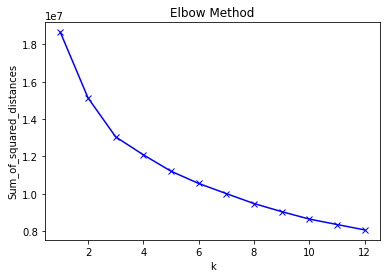

In [57]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

<br>To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 5.
<br><br>

In [58]:
model = KMeans(n_clusters = 5)
model.fit(df2)
labels_train = np.array(model.labels_)

## <span style="color:blue">Observing results</span>

<br>For observing clusters, we need to have a new unmodified table.<br>
Here I replaced the Segmentation column with my cluster_ind column.<br><br>

In [59]:
df['Cluster_Ind'] = labels_train
print(df['Cluster_Ind'].unique())
df

[1 3 4 0 2]


,user_id,date,meal_type,Calories,Carbs,Fat,Protein,Sodium,Sugar,Fiber,Cluster_Ind
0,1,-2.382812,-1.129883,2.353516,1.104492,1.242188,1.180664,0.816406,2.039062,-0.661621,1
1,1,-2.382812,-1.129883,2.050781,1.512695,1.575195,1.593750,0.816406,2.291016,-0.661621,1
2,1,-2.382812,-1.129883,2.265625,1.651367,1.668945,1.593750,0.816406,2.291016,-0.661621,1
3,1,-2.382812,-1.129883,2.132812,1.237305,1.890625,1.593750,0.816406,2.123047,-0.661621,1
4,1,-2.382812,-1.129883,2.218750,1.620117,1.890625,1.593750,0.816406,2.242188,-0.661621,1
...,...,...,...,...,...,...,...,...,...,...,...
2071842,9897,1.506836,-0.249268,1.292969,1.222656,1.058594,1.279297,-1.229492,0.998535,1.316406,0
2071843,9897,1.506836,-0.836426,-0.012627,-1.067383,0.750000,0.429443,-1.229492,-0.942383,0.103455,4
2071844,9897,1.506836,-0.542969,-0.371826,-0.049683,0.276367,0.025711,-1.229492,-0.445557,0.103455,4
2071845,9897,1.506836,-0.249268,1.242188,0.747559,1.805664,0.387939,-1.229492,0.776367,1.879883,0


<br>
Let's calculate the number of rows (elements) in each cluster.
<br><br>

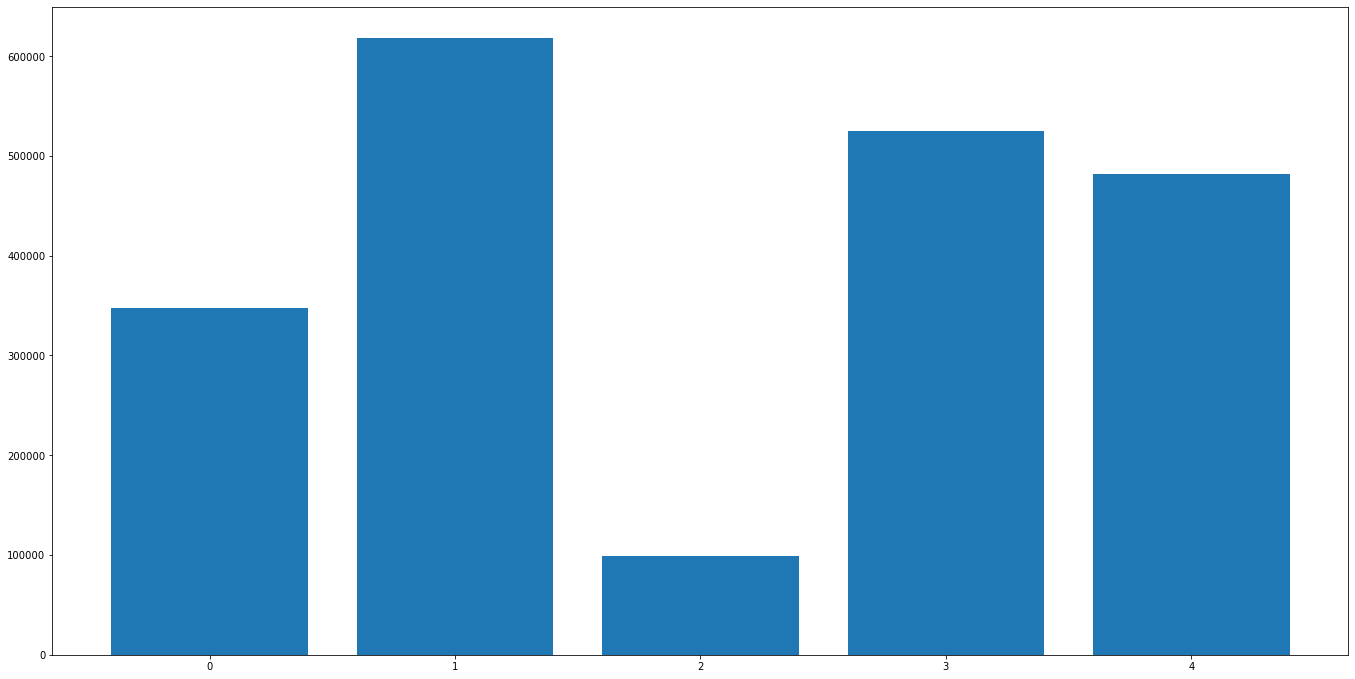

In [60]:
fig = plt.figure(1,figsize=(18,9))
ax = fig.add_axes([0,0,1,1])
ax.bar(df['Cluster_Ind'].unique(), df['Cluster_Ind'].value_counts())
plt.show()

<br>
<span style="color:red">2</span> - The smallest cluster here.
<br>
<span style="color:red">0</span> - Smaller than average  size cluster.
<br>
<span style="color:red">4</span> - Bigger than average  size cluster 1.
<br>
<span style="color:red">3</span> - Bigger than average  size cluster 2.
<br>
<span style="color:red">1</span> - The largest cluster here.
<br><br>
Let's how clusters' elements are separated in dates.
<br><br>

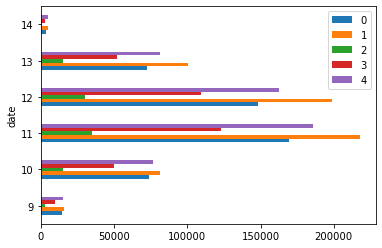

In [61]:
ax = pd.crosstab(saved1['date'], df['Cluster_Ind']).plot.barh()
ax.legend(loc=1,fontsize=10)

<br><span style="color:brown">It seems that the popularity of an application increases from September 2014 to the end of the year and then starts decreasing in 2015.</span>
<br><br>
The graph doesn't say much about the clusters, because the tendency is similar every month here. Only one thing: <br>
<span style="color:red">2</span> - cluster elements are not from 2015 February.
<br><br>
Let's how clusters' elements are separated in meal_type.
<br><br>

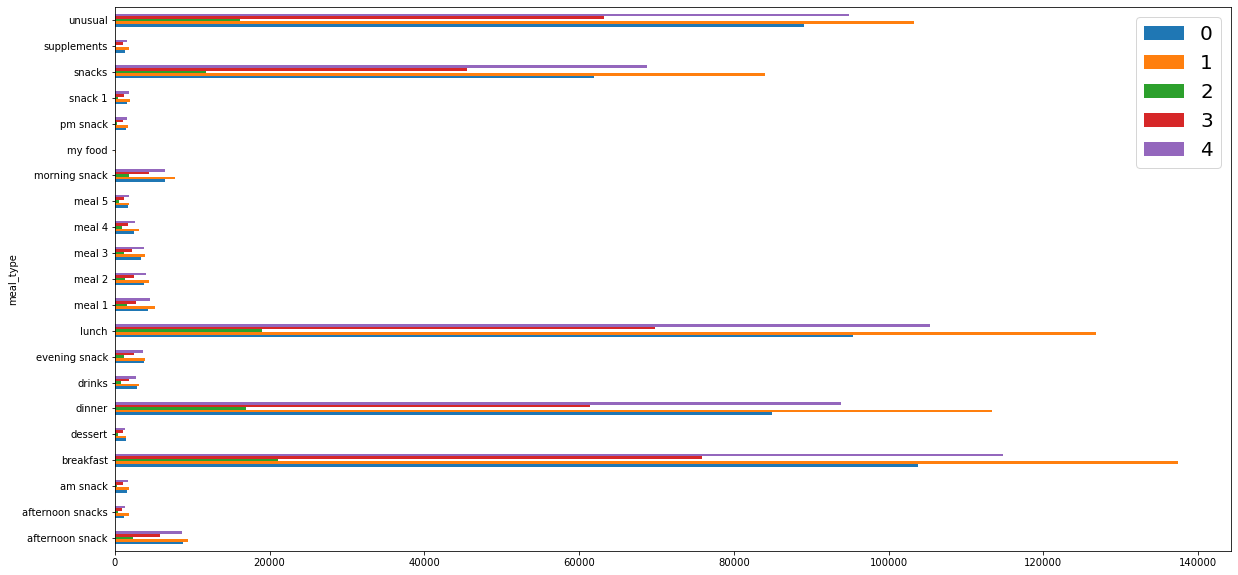

In [62]:
ax = pd.crosstab(saved['meal_type'], df['Cluster_Ind']).plot.barh(figsize=(20,10))
ax.legend(loc=1,fontsize=20)

<br>
The graph is too big and complicated. So it's a good idea to render these distributions for a specific cluster. We can see that breakfast, dinner, lunch, snacks contain most elements (it was well-known for us already).
<br><br>

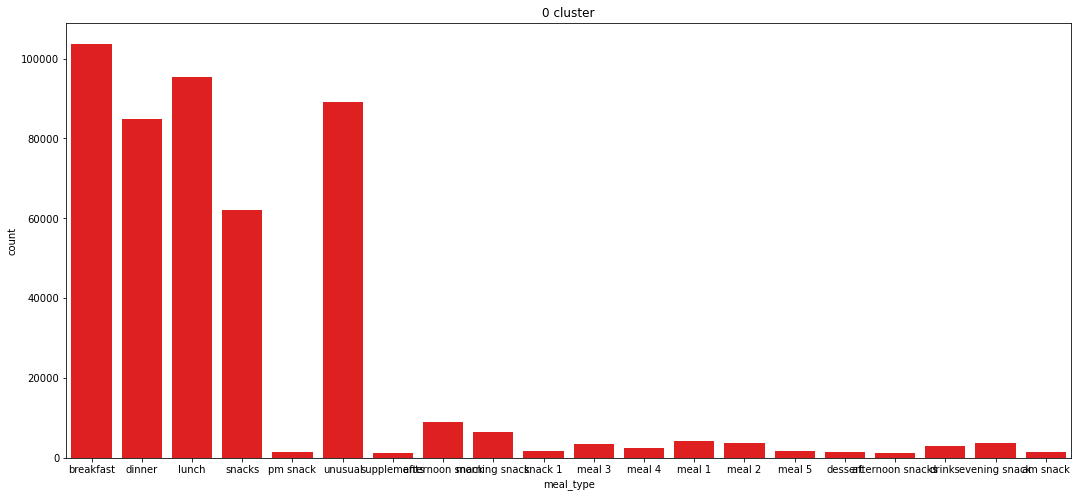

In [63]:
fig = plt.figure(1,figsize=(18,8))
saved['Cluster_Ind'] = df['Cluster_Ind']
sss = saved[saved['Cluster_Ind'] == 0]
ax = sns.countplot(x=sss['meal_type'], color='r')
ax.title.set_text('0 cluster')
plt.show()

<br>
<span style="color:red">0</span> - cluster elements are mostly in breakfast, lunch, dinner, snacks.
<br><br>

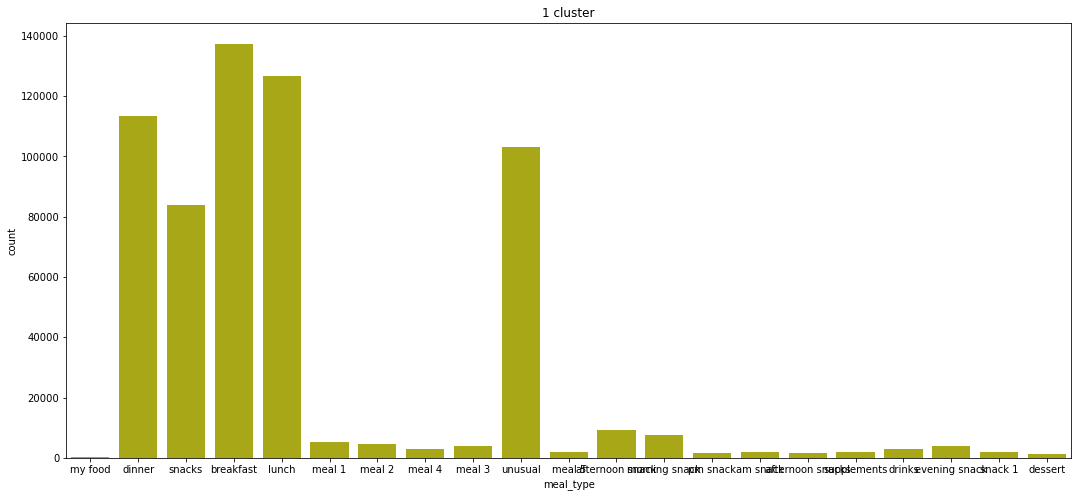

In [64]:
fig = plt.figure(1,figsize=(18,8))
sss = saved[saved['Cluster_Ind'] == 1]
ax = sns.countplot(x=sss['meal_type'], color='y')
ax.title.set_text('1 cluster')
plt.show()

<br>
<span style="color:red">1</span> - cluster elements are mostly in breakfast, lunch, dinner, snacks.
<br><br>

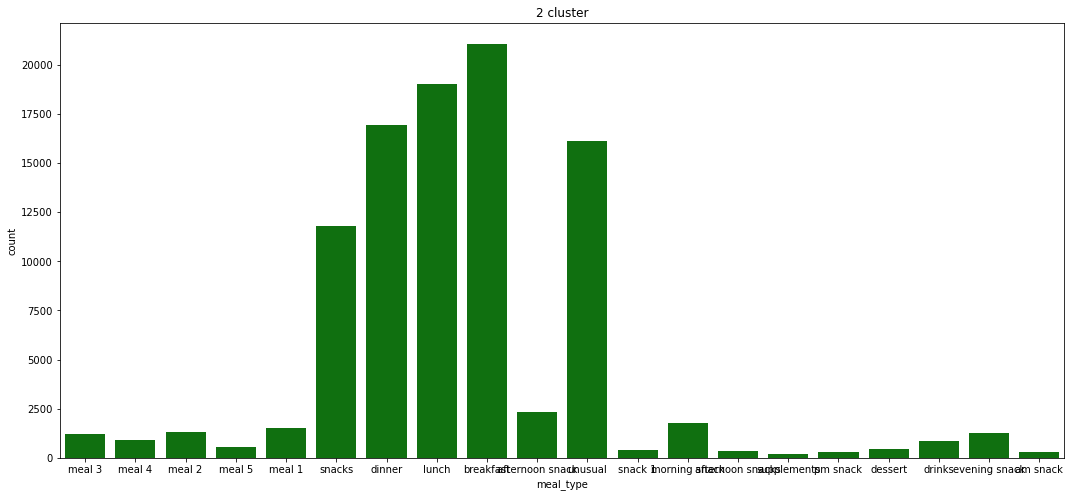

In [65]:
fig = plt.figure(1,figsize=(18,8))
sss = saved[saved['Cluster_Ind'] == 2]
ax = sns.countplot(x=sss['meal_type'], color='g')
ax.title.set_text('2 cluster')
plt.show()

<br>
<span style="color:red">2</span> - cluster elements are mostly in breakfast, lunch, dinner, snacks.
<br><br>

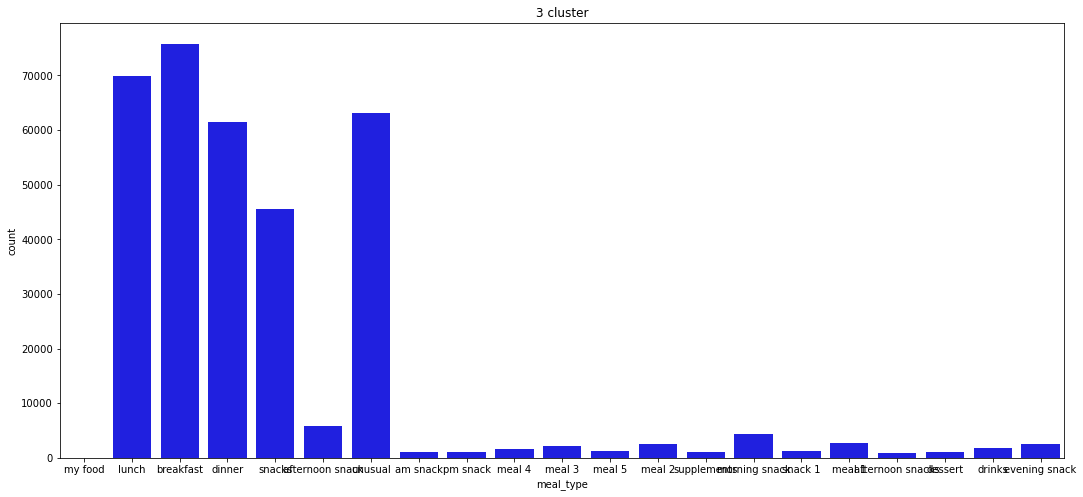

In [66]:
fig = plt.figure(1,figsize=(18,8))
sss = saved[saved['Cluster_Ind'] == 3]
ax = sns.countplot(x=sss['meal_type'], color='b')
ax.title.set_text('3 cluster')
plt.show()

<br>
<span style="color:red">3</span> - cluster elements are mostly in breakfast, lunch, dinner, snacks.
<br><br>

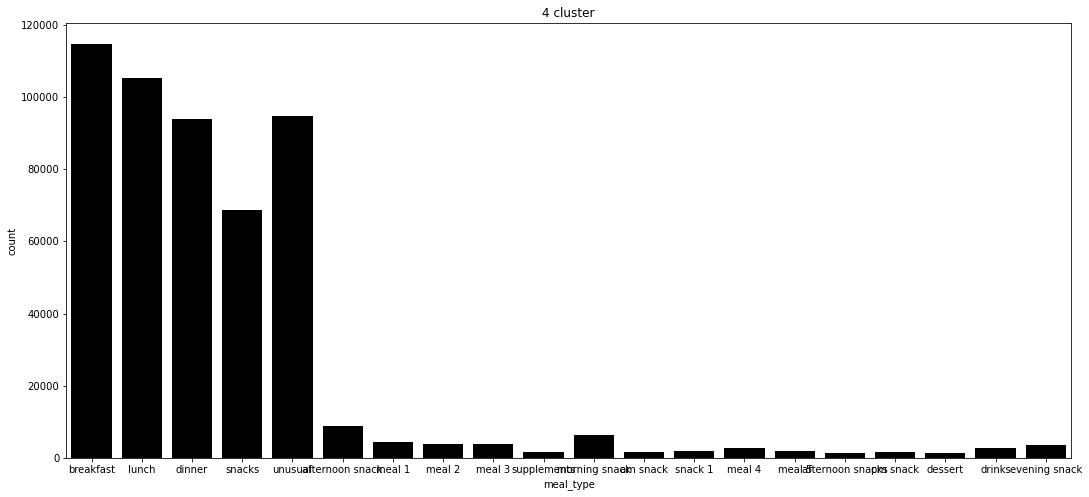

In [67]:
fig = plt.figure(1,figsize=(18,8))
sss = saved[saved['Cluster_Ind'] == 4]
ax = sns.countplot(x=sss['meal_type'], color='black')
ax.title.set_text('4 cluster')
plt.show()

<br>
<span style="color:red">4</span> - cluster elements are mostly in breakfast, lunch, dinner, snacks.
<br><br>

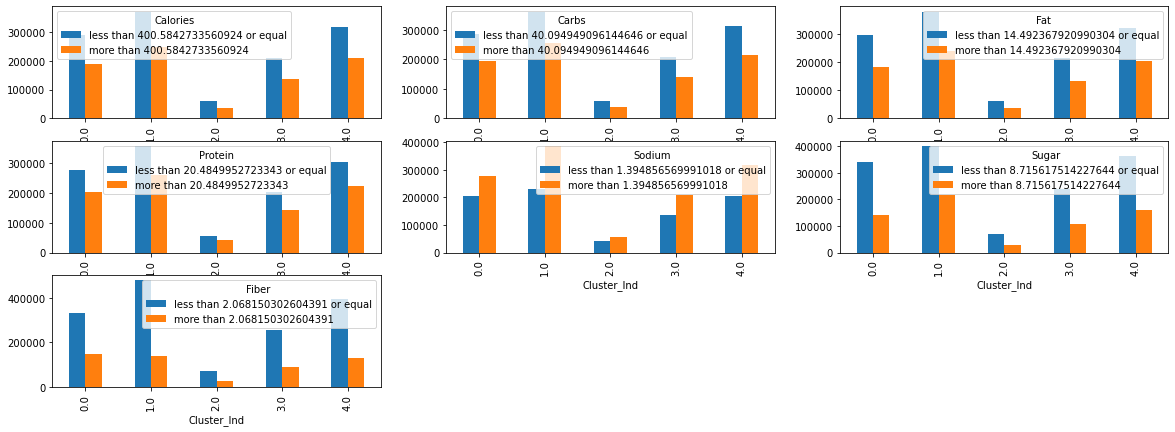

In [68]:
def Average(lst):
    return sum(lst) / len(lst)

def somefn(col):
    some = saved[col].tolist()
    avg = Average(some)
    for i in range(len(some)):
        if some[i] <= avg:
            some[i] = 'less than ' + str(avg) + ' or equal'
        else:
            some[i] = 'more than ' + str(avg)
    return some

i = 1
for col in df2.columns.tolist()[2:]:
    plt.figure(1,figsize=(20,7))
    ax=plt.subplot(3,3,i)
    i += 1
    pd.crosstab(saved['Cluster_Ind'], [somefn(col)], colnames=[col]).plot(kind='bar', ax=ax)

<br>
Everything looks like each other. Tendentious is the same, just cluster size defines that counts are still different.
<br>
<span style="color:red">1</span> - the cluster contains elements with higher nutrition levels than average are (except sodium).
<br><br>

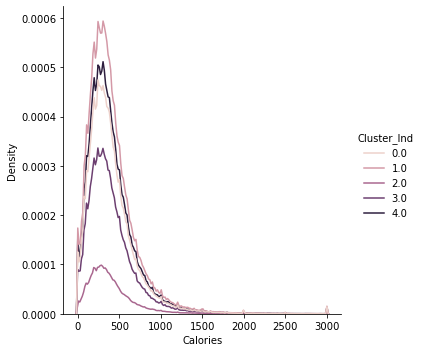

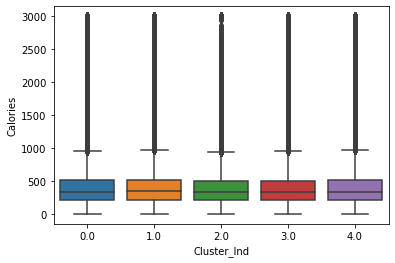

In [69]:
sns.displot(saved, x="Calories", hue="Cluster_Ind", kind="kde", bw_adjust=.25)
plt.xlabel('Calories')
plt.ylabel('Density')
plt.show()
sns.boxplot(data = saved, x = "Cluster_Ind", y="Calories")
plt.show()

<br>
<span style="color:red">1-5</span> - calories level is near 250-500 is mostly in each cluster.
<br><br>

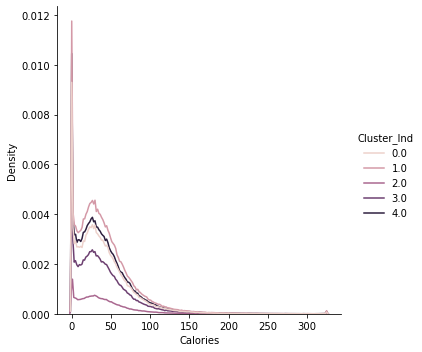

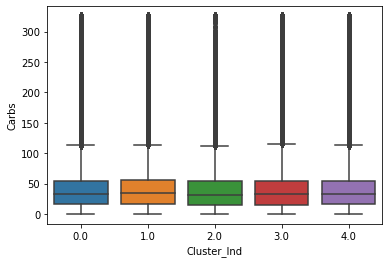

In [70]:
sns.displot(saved, x="Carbs", hue="Cluster_Ind", kind="kde", bw_adjust=.25)
plt.xlabel('Calories')
plt.ylabel('Density')
plt.show()
sns.boxplot(data = saved, x = "Cluster_Ind", y="Carbs")
plt.show()

<br>
<span style="color:red">1-5</span> - carbs level is near 20-55 is mostly in each cluster.
<br><br>

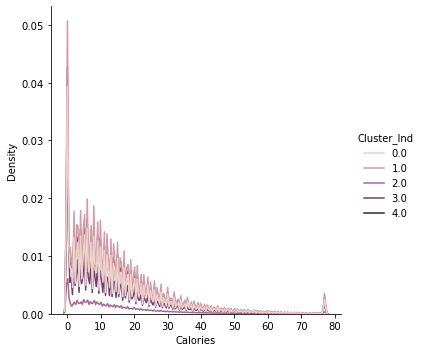

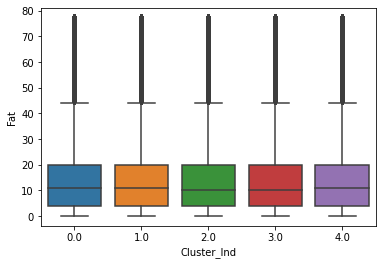

In [71]:
sns.displot(saved, x="Fat", hue="Cluster_Ind", kind="kde", bw_adjust=.25)
plt.xlabel('Calories')
plt.ylabel('Density')
plt.show()
sns.boxplot(data = saved, x = "Cluster_Ind", y="Fat")
plt.show()

<br>
<span style="color:red">1-5</span> - fat level is near 5-20 is mostly in each cluster.
<br><br>

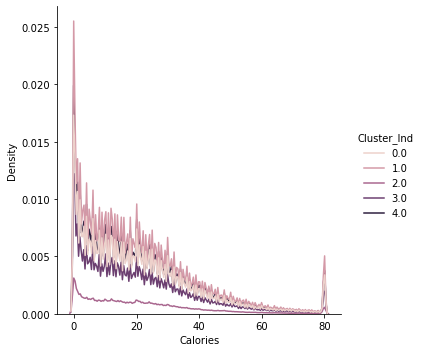

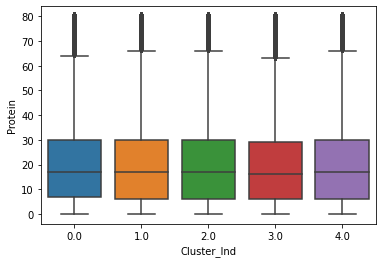

In [72]:
sns.displot(saved, x="Protein", hue="Cluster_Ind", kind="kde", bw_adjust=.25)
plt.xlabel('Calories')
plt.ylabel('Density')
plt.show()
sns.boxplot(data = saved, x = "Cluster_Ind", y="Protein")
plt.show()

<br>
<span style="color:red">3</span> - protein values are a little bit smaller (in average, totally in cluster) than in other clusters.
<br><br>

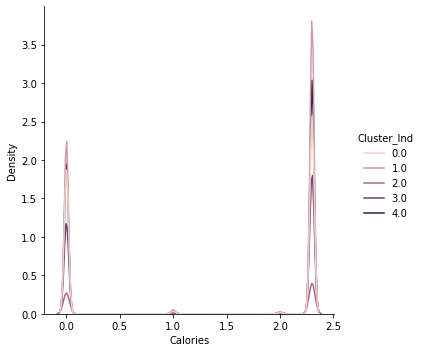

In [73]:
sns.displot(saved, x="Sodium", hue="Cluster_Ind", kind="kde", bw_adjust=.25)
plt.xlabel('Calories')
plt.ylabel('Density')
plt.show()

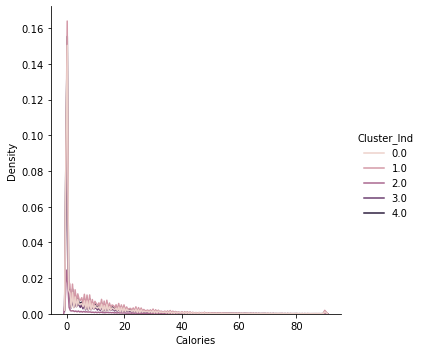

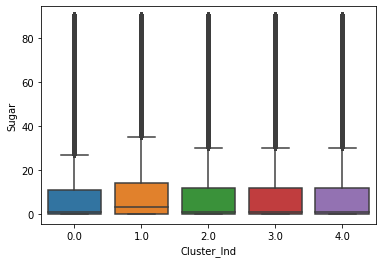

In [74]:
sns.displot(saved, x="Sugar", hue="Cluster_Ind", kind="kde", bw_adjust=.25)
plt.xlabel('Calories')
plt.ylabel('Density')
plt.show()
sns.boxplot(data = saved, x = "Cluster_Ind", y="Sugar")
plt.show()

<br>
<span style="color:red">1</span> - cluster contains more non zero and large sugar values than others.
<br>
<span style="color:red">0</span> - cluster contains many zero values and small sugar values than others.
<br><br>

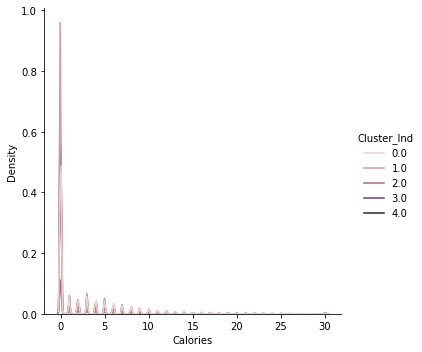

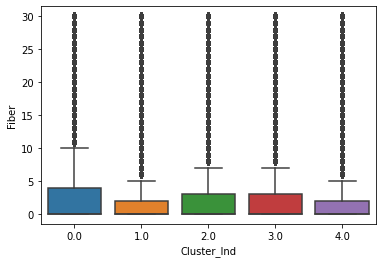

In [75]:
sns.displot(saved, x="Fiber", hue="Cluster_Ind", kind="kde", bw_adjust=.25)
plt.xlabel('Calories')
plt.ylabel('Density')
plt.show()
sns.boxplot(data = saved, x = "Cluster_Ind", y="Fiber")
plt.show()

<br>
Generally many 0 values are in data.
<br>
<span style="color:red">0</span> - cluster contains elements with fibar value near 0-2.
<br>
<span style="color:red">2</span> - cluster contains elements with fibar value near 0-3.
<br>
<span style="color:red">4</span> - cluster contains elements with fibar value near 0-2.
<br>
<span style="color:red">3</span> - cluster contains elements with fibar value near 0-3.
<br>
<span style="color:red">1</span> - cluster contains elements with fibar value near 0-4.
<br><br>

# <span style="color:green;">Summerize</span>

<br>
<span style="color:red">0</span> - cluster contains elements with fibar value near 0-2; contains many zero values and small sugar values than others; the cluster contains elements with higher nutrition levels than average are (except sodium).
<br>
<span style="color:red">2</span> - cluster contains elements with fibar value near 0-3, its elements are not from 2015 February.
<br>
<span style="color:red">4</span> - cluster contains elements with fibar value near 0-2.
<br>
<span style="color:red">3</span> - cluster contains elements with fibar value near 0-3; protein values are a little bit smaller (in average, totally in cluster) than in other clusters.
<br>
<span style="color:red">1</span> - cluster contains elements with fibar value near 0-4; contains more non zero and large sugar values than others.
<br><br>

## <span style="color:blue;">PCA algorithm</span>

<br>PCA is a linear transformation that finds the "principal components", or directions of greatest variance, in a data set.  It can be used for dimension reduction among other things.<br>
when there are a large number of variables or dimensions along which the data is distributed, visualization can be a challenge and almost impossible.
Hence, PCA can do that for you since it projects the data into a lower dimension, thereby allowing you to visualize the data in a 2D or 3D space with a naked eye.<br>
Principal components are the key to PCA; they represent what's underneath the hood of your data. In a layman term, when the data is projected into a lower dimension (assume three dimensions) from a higher space, the three dimensions are nothing but the three Principal Components that captures (or holds) most of the variance (information) of your data.<br>
We want to visualize the data in 2D (beacause it is easier to visualize).
<br><br>

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_trans = pca.fit_transform(df2)

In [77]:
pca_trans = pd.DataFrame(data = pca_trans
             , columns = ['First Principal Column', 'Second Principal Column'])

<br>Now we can use labels that we got from kmeans and group them, identify them.<br><br>

In [78]:
pca_trans['Cluster_Ind']= np.array(df['Cluster_Ind'])

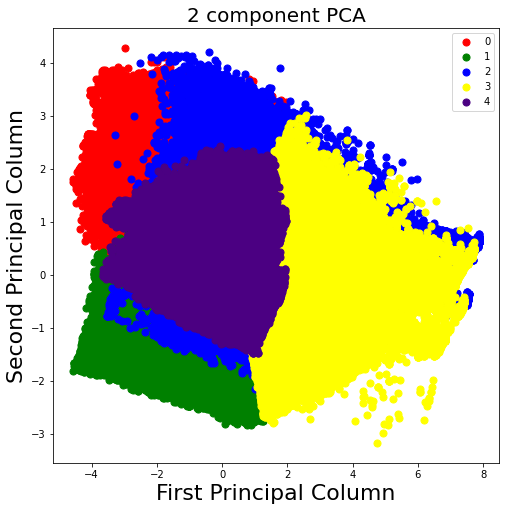

In [79]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Column', fontsize = 22)
ax.set_ylabel('Second Principal Column', fontsize = 22)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2, 3, 4]
colors = ['r', 'g', 'b','yellow', 'indigo']
for target, color in zip(targets, colors):
    label_indices = pca_trans['Cluster_Ind'] == target
    ax.scatter(pca_trans.loc[label_indices, 'First Principal Column'],
               pca_trans.loc[label_indices,'Second Principal Column']
               , c = color
               , s = 50)
ax.legend(targets)

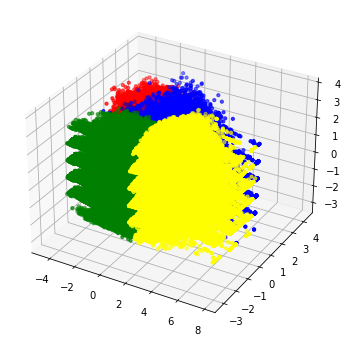

In [80]:
pca = PCA(n_components=3)
pca_trans = pca.fit_transform(df2)
pca_trans = pd.DataFrame(data = pca_trans
             , columns = ['First Principal Column', 'Second Principal Column', 'Third Principal Column'])
pca_trans['Cluster_Ind']= np.array(df['Cluster_Ind'])
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for target, color in zip(targets, colors):
    label_indices = pca_trans['Cluster_Ind'] == target
    ax.scatter(pca_trans.loc[label_indices,'First Principal Column'],
               pca_trans.loc[label_indices,'Second Principal Column'],
               pca_trans.loc[label_indices,'Third Principal Column']
               , c = color
               , s = 10)

<br>
PCA should be used mainly for variables which are strongly correlated. If the relationship is weak between variables, PCA does not work well to reduce data. Refer to the correlation matrix to determine. In general, if most of the correlation coefficients are smaller than 0.3, PCA will not help.
<br><br>

## <span style="color:blue">Hierarchical Clustering</span>

<br>
At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K, while K is an integer representing the number of data points.
Form a cluster by joining the two closest data points resulting in K-1 clusters.
Form more clusters by joining the two closest clusters resulting in K-2 clusters.
Repeat the above three steps until one big cluster is formed.
Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem. We will study the concept of dendrogram in detail in an upcoming section.
<br><br>

In [81]:
num=10000
clusters=5
data=df2.sample(n=num, random_state=1)

In [82]:
data

,date,meal_type,Calories,Carbs,Fat,Protein,Sodium,Sugar,Fiber
1751781,0.534180,-0.836426,1.321289,0.432129,1.415039,1.593750,-1.229492,1.128906,2.328125
1748111,1.506836,-0.542969,0.411621,-1.067383,1.218750,0.612305,0.816406,-0.942383,-0.661621
320515,0.534180,-0.836426,0.128418,0.487793,0.343018,0.025711,0.816406,1.128906,-0.661621
3977,0.534180,0.044159,-1.147461,0.161743,-2.033203,-1.711914,-1.229492,1.205078,-0.661621
1671999,-1.410156,-0.249268,-0.016388,-1.345703,-1.410156,1.475586,0.816406,-0.154907,-0.661621
...,...,...,...,...,...,...,...,...,...
1748176,-0.437988,-0.836426,-0.761719,0.161743,-0.785156,-0.274902,0.816406,1.167969,-0.661621
1371090,2.478516,1.217773,0.851562,0.620117,1.333008,0.429443,0.816406,1.625977,-0.661621
1310326,-0.437988,-0.249268,0.125122,-2.675781,0.518066,1.144531,0.816406,-0.942383,-0.661621
948613,0.534180,-0.836426,0.867188,0.540039,1.029297,0.791504,-1.229492,0.949219,-0.661621


In [83]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([0, 2, 4, ..., 2, 0, 4], dtype=int64)

In [84]:
data['Cluster_Ind'] = cluster.labels_
pca = PCA(n_components=2)
pca_trans = pca.fit_transform(data)
pca_trans = pd.DataFrame(data = pca_trans
             , columns = ['First Principal Column', 'Second Principal Column'])
data

,date,meal_type,Calories,Carbs,Fat,Protein,Sodium,Sugar,Fiber,Cluster_Ind
1751781,0.534180,-0.836426,1.321289,0.432129,1.415039,1.593750,-1.229492,1.128906,2.328125,0
1748111,1.506836,-0.542969,0.411621,-1.067383,1.218750,0.612305,0.816406,-0.942383,-0.661621,2
320515,0.534180,-0.836426,0.128418,0.487793,0.343018,0.025711,0.816406,1.128906,-0.661621,4
3977,0.534180,0.044159,-1.147461,0.161743,-2.033203,-1.711914,-1.229492,1.205078,-0.661621,1
1671999,-1.410156,-0.249268,-0.016388,-1.345703,-1.410156,1.475586,0.816406,-0.154907,-0.661621,2
...,...,...,...,...,...,...,...,...,...,...
1748176,-0.437988,-0.836426,-0.761719,0.161743,-0.785156,-0.274902,0.816406,1.167969,-0.661621,2
1371090,2.478516,1.217773,0.851562,0.620117,1.333008,0.429443,0.816406,1.625977,-0.661621,4
1310326,-0.437988,-0.249268,0.125122,-2.675781,0.518066,1.144531,0.816406,-0.942383,-0.661621,2
948613,0.534180,-0.836426,0.867188,0.540039,1.029297,0.791504,-1.229492,0.949219,-0.661621,0


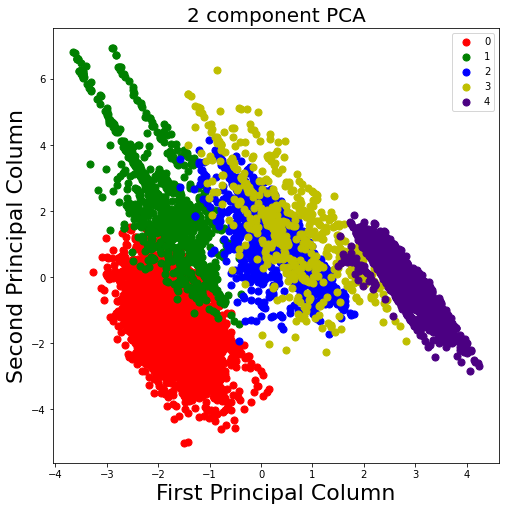

In [85]:
pca_trans['Cluster_Ind']= np.array(data['Cluster_Ind'])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Column', fontsize = 22)
ax.set_ylabel('Second Principal Column', fontsize = 22)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2,3,4]
colors = ['r', 'g', 'b','y','indigo']
for target, color in zip(targets, colors):
    label_indices = pca_trans['Cluster_Ind'] == target
    ax.scatter(pca_trans.loc[label_indices, 'First Principal Column'],
               pca_trans.loc[label_indices,'Second Principal Column']
               , c = color
               , s = 50)
ax.legend(targets)

<br>Clusters resembles one from kmeans. Colors are different, but we still see resemblance.<br><br>

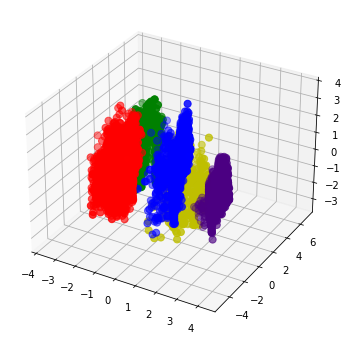

In [86]:
pca = PCA(n_components=3)
pca_trans = pca.fit_transform(data)
pca_trans = pd.DataFrame(data = pca_trans
             , columns = ['First Principal Column', 'Second Principal Column', 'Third Principal Column'])
pca_trans['Cluster_Ind']= np.array(data['Cluster_Ind'])
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for target, color in zip(targets, colors):
    label_indices = pca_trans['Cluster_Ind'] == target
    ax.scatter(pca_trans.loc[label_indices,'First Principal Column'],
               pca_trans.loc[label_indices,'Second Principal Column'],
               pca_trans.loc[label_indices,'Third Principal Column']
               , c = color
               , s = 50)

## <span style="color:blue">DBSCAN Clustering</span>

<br>
Clustering analysis or simply Clustering is basically an Unsupervised learning method that divides the data points into a number of specific batches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense. It comprises of many different methods based on different evolution ( K-Means (distance between points), Affinity propagation (graph distance), Mean-shift (distance between points)...).<br>
All clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. Here we will focus on Density-based spatial clustering of applications with noise (DBSCAN) clustering method.<br>
DBSCAN algorithm requires two parameters –

1. eps : It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered as neighbors. If the eps value is chosen too small then large part of the data will be considered as outliers. If it is chosen very large then the clusters will merge and majority of the data points will be in the same clusters. One way to find the eps value is based on the k-distance graph.
2. MinPts: Minimum number of neighbors (data points) within eps radius. Larger the dataset, the larger value of MinPts must be chosen. As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1.<br> <br>
In this algorithm, we have 3 types of data points.

- Core Point: A point is a core point if it has more than MinPts points within eps.
- Border Point: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point.
- Noise or outlier: A point which is not a core point or border point.
<br><br>

In [87]:
num=10000
clusters=3
data=df2.sample(n=num, random_state=1)

from sklearn.cluster import DBSCAN 
from sklearn import metrics 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
  
# Load data in X 
# db = DBSCAN(eps=0.04, min_samples=17).fit(train_df) 
db = DBSCAN(eps=0.8, min_samples=40).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 
  
# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
  
print(labels) 

[-1 -1  0 ... -1 -1  1]


['y', 'b', 'g', 'r']


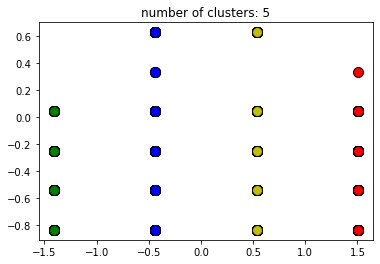

In [88]:
import matplotlib.pyplot as plt 
unique_labels = set(labels) 
colors = ['y', 'b', 'g', 'r'] 
print(colors) 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
  
    class_member_mask = (labels == k) 
  
    xy = data[class_member_mask & core_samples_mask] 
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=10) 
  
    xy = data[class_member_mask & ~core_samples_mask] 
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=10) 
  
plt.title('number of clusters: %d' %n_clusters_) 
plt.show() 

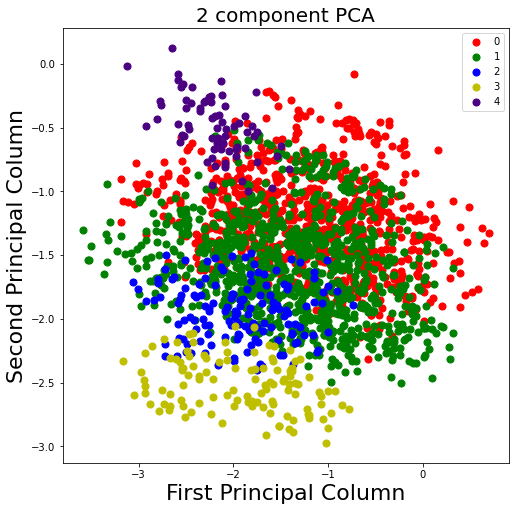

In [89]:
data['Cluster_Ind'] = labels
pca = PCA(n_components=2)
pca_trans = pca.fit_transform(data)
pca_trans = pd.DataFrame(data = pca_trans
             , columns = ['First Principal Column', 'Second Principal Column'])
pca_trans['Cluster_Ind']= np.array(data['Cluster_Ind'])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Column', fontsize = 22)
ax.set_ylabel('Second Principal Column', fontsize = 22)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2,3,4]
colors = ['r', 'g', 'b','y','indigo']
for target, color in zip(targets, colors):
    label_indices = pca_trans['Cluster_Ind'] == target
    ax.scatter(pca_trans.loc[label_indices, 'First Principal Column'],
               pca_trans.loc[label_indices,'Second Principal Column']
               , c = color
               , s = 50)
ax.legend(targets)

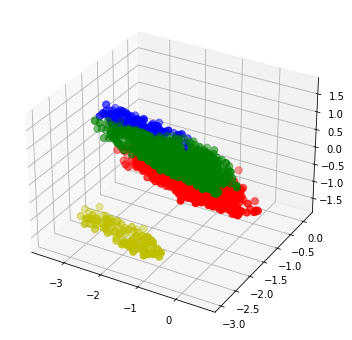

In [90]:
pca = PCA(n_components=3)
pca_trans = pca.fit_transform(data)
pca_trans = pd.DataFrame(data = pca_trans
             , columns = ['First Principal Column', 'Second Principal Column', 'Third Principal Column'])
pca_trans['Cluster_Ind']= np.array(data['Cluster_Ind'])
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for target, color in zip(targets, colors):
    label_indices = pca_trans['Cluster_Ind'] == target
    ax.scatter(pca_trans.loc[label_indices,'First Principal Column'],
               pca_trans.loc[label_indices,'Second Principal Column'],
               pca_trans.loc[label_indices,'Third Principal Column']
               , c = color
               , s = 50)

<br>This clustering algorithm seems really interesting, but I think that my emp and min_samples are good enough. I tries alot of variations of them. For 3 cluster, the noise is too big. <br><br>